In [178]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy import stats
%matplotlib inline

In [179]:
df = pd.read_csv('../WORK/surf_bT_ret_171031.txt', header=None, delimiter=r"\s+", names = [' ', 'UTC', 'MY', 'L_s', 'LTST', 'Surf_lat', 'Surf_lon', 'Surf_rad', 'Surf_elev', 'T_surf', 'T_surf_err', 'Dust_column', 'Dust_column_err', 'H2Oice_column', 'H2Oice_column_err', 'p_surf', 'p_surf_err', 'P_qual', 'T_qual'])
#read data into dataframe

In [180]:
df.to_csv('mcs.csv')#converted dataframe to csv

MCS Retrieved Surface Brightness Temperatures   
v5.2.4 retrievals (2D all)  
-9999 means no data for the field  
Processed by: dkass at: Mon Oct 30 18:35:42 2017  

In [181]:
df.tail(50)#checking for correct data

UTC  MY       L_s      LTST  Surf_lat  \
5840778  31-Oct-2017  03:29:16.325  34  81.24550  0.635705 -52.54447   
5840779  31-Oct-2017  03:30:25.956  34  81.24585  0.634449 -48.88647   
5840780  31-Oct-2017  03:31:33.540  34  81.24620  0.633491 -44.43297   
5840781  31-Oct-2017  03:32:43.172  34  81.24655  0.633253 -41.12448   
5840782  31-Oct-2017  03:33:50.755  34  81.24689  0.633024 -37.73897   
5840783  31-Oct-2017  03:34:41.955  34  81.24715  0.632669 -34.35649   
5840784  31-Oct-2017  03:35:12.675  34  81.24731  0.632464 -32.66649   
5840785  31-Oct-2017  03:35:43.394  34  81.24746  0.632240 -30.97898   
5840786  31-Oct-2017  03:36:14.114  34  81.24762  0.632009 -29.35298   
5840787  31-Oct-2017  03:36:44.834  34  81.24777  0.631734 -27.67599   
5840788  31-Oct-2017  03:37:15.555  34  81.24793  0.631423 -26.83781   
5840789  31-Oct-2017  03:37:46.274  34  81.24809  0.631446 -26.00549   
5840790  31-Oct-2017  03:38:16.993  34  81.24824  0.631095 -24.33749   
5840791  31-Oct-2017  03:38:47.713  34  81.24840  0.630457 -22.72749   
5840792  31-Oct-2017  03:39:18.433  34  81.24855  0.629733 -21.13399   
5840793  31-Oct-2017  03:39:49.153  34  81.24871  0.628528 -18.74978   
5840794  31-Oct-2017  03:40:19.873  34  81.24886  0.627889 -17.11494   
5840795  31-Oct-2017  03:40:50.592  34  81.24902  0.627525 -14.72249   
5840796  31-Oct-2017  03:41:21.312  34  81.24918  0.627539 -14.72249   
5840797  31-Oct-2017  03:41:52.031  34  81.24933  0.626977 -10.93200   
5840798  31-Oct-2017  03:42:22.752  34  81.24949  0.626991 -10.93200   
5840799  31-Oct-2017  03:42:53.472  34  81.24964  0.626684  -6.83900   
5840800  31-Oct-2017  03:43:54.911  34  81.24995  0.626138  -5.01800   
5840801  31-Oct-2017  03:44:25.631  34  81.25011  0.626151  -5.01800   
5840802  31-Oct-2017  03:47:23.807  34  81.25101  0.624311   6.59650   
5840803  31-Oct-2017  03:48:33.438  34  81.25137  0.623493   9.89300   
5840804  31-Oct-2017  03:49:41.021  34  81.25170  0.622620  13.19099   
5840805  31-Oct-2017  03:50:28.125  34  81.25195  0.621901  16.49999   
5840806  31-Oct-2017  03:50:58.844  34  81.25210  0.621538  18.18199   
5840807  31-Oct-2017  03:51:29.564  34  81.25226  0.621171  19.86499   
5840808  31-Oct-2017  03:52:00.284  34  81.25241  0.620823  21.49199   
5840809  31-Oct-2017  03:52:31.003  34  81.25257  0.620455  23.17599   
5840810  31-Oct-2017  03:53:01.725  34  81.25272  0.620115  24.80199   
5840811  31-Oct-2017  03:53:32.443  34  81.25288  0.620129  24.80199   
5840812  31-Oct-2017  03:54:03.164  34  81.25304  0.619142  29.67598   
5840813  31-Oct-2017  03:54:33.883  34  81.25319  0.619133  29.67598   
5840814  31-Oct-2017  03:55:04.604  34  81.25335  0.618820  31.35499   
5840815  31-Oct-2017  03:55:35.323  34  81.25350  0.618550  32.97498   
5840816  31-Oct-2017  03:56:06.042  34  81.25366  0.618393  34.64298   
5840817  31-Oct-2017  03:56:36.761  34  81.25381  0.618423  36.26548   
5840818  31-Oct-2017  03:56:47.002  34  81.25386  0.618420  36.26548   
5840819  31-Oct-2017  03:56:57.242  34  81.25392  0.618368  37.94198   
5840820  31-Oct-2017  03:57:07.482  34  81.25397  0.618388  37.94198   
5840821  31-Oct-2017  03:57:17.722  34  81.25402  0.618385  37.94198   
5840822  31-Oct-2017  03:57:27.961  34  81.25407  0.618358  39.56698   
5840823  31-Oct-2017  03:57:38.203  34  81.25413  0.618380  39.56698   
5840824  31-Oct-2017  03:58:06.875  34  81.25427  0.618319  41.25348   
5840825  31-Oct-2017  03:58:37.594  34  81.25442  0.618188  42.94198   
5840826  31-Oct-2017  03:59:08.312  34  81.25458  0.617757  44.55397   
5840827  31-Oct-2017  03:59:39.033  34  81.25474  0.616953  47.50397   

          Surf_lon  Surf_rad  Surf_elev   T_surf  T_surf_err  Dust_column  \
5840778 -140.31651  3385.925      1.265  143.447       0.049       0.0001   
5840779 -141.04250  3387.305      1.505  146.295       0.047       0.0017   
5840780 -141.71249  3388.904      2.044  169.862       0.040       0.0003   
5840781 -142.04649  3390.069      2.069  171.008  

In [182]:
df.columns#checking for correct data order

Index([u' ', u'UTC', u'MY', u'L_s', u'LTST', u'Surf_lat', u'Surf_lon',
       u'Surf_rad', u'Surf_elev', u'T_surf', u'T_surf_err', u'Dust_column',
       u'Dust_column_err', u'H2Oice_column', u'H2Oice_column_err', u'p_surf',
       u'p_surf_err', u'P_qual', u'T_qual'],
      dtype='object')

In [183]:
df.dtypes #undesrstanding datatypes of each column

                      object
UTC                   object
MY                     int64
L_s                  float64
LTST                 float64
Surf_lat             float64
Surf_lon             float64
Surf_rad             float64
Surf_elev            float64
T_surf               float64
T_surf_err           float64
Dust_column          float64
Dust_column_err      float64
H2Oice_column        float64
H2Oice_column_err    float64
p_surf               float64
p_surf_err           float64
P_qual                 int64
T_qual                 int64
dtype: object

In [184]:
UTC_df = df['UTC'] #for this I assigned the Dataframe columns to specific variables
MY_df = df['MY'] 
L_s_df = df['L_s']
LTST_df = df['LTST'] 
Surf_lat_df = df['Surf_lat'] 
Surf_lon_df = df['Surf_lon'] 
Surf_rad_df = df['Surf_rad'] 
Surf_elev_df = df['Surf_elev'] 
T_surf_df = df['T_surf'] 
T_surf_err_df = df['T_surf_err'] 
Dust_column_df = df['Dust_column'] 
Dust_column_err_df = df['Dust_column_err'] 
H2Oice_column_df = df['H2Oice_column']
H2Oice_column_err_df = df['H2Oice_column_err'] 
p_surf_df = df['p_surf'] 
p_surf_err_df = df['p_surf_err']
P_qual_df = df['P_qual'] 
T_qual_df = df['T_qual']

In [185]:
UTC_df_sample = UTC_df.head(25) #sampled the previous variables to small amount of sets
MY_df_sample = MY_df.head(25)
L_s_df_sample = L_s_df.head(25)
LTST_df_sample = LTST_df.head(25)
Surf_lat_df_sample = Surf_lat_df.head(25)
Surf_lon_df_sample = Surf_lon_df.head(25)
Surf_rad_df_sample = Surf_rad_df.head(25)
Surf_elev_df_sample = Surf_elev_df.head(25)
T_surf_df_sample = T_surf_df.head(25)
T_surf_err_sample = T_surf_err_df.head(25)
Dust_column_df_sample = Dust_column_df.head(25)
Dust_column_err_df_sample = Dust_column_err_df.head(25)
H2Oice_column_df_sample = H2Oice_column_df.head(25)
H2Oice_column_err_df_sample = H2Oice_column_err_df.head(25)
p_surf_df_sample = p_surf_df.head(25)
p_surf_err_df_sample = p_surf_err_df.head(25)
P_qual_df_sample = P_qual_df.head(25)
T_qual_df_sample = T_qual_df.head(25)

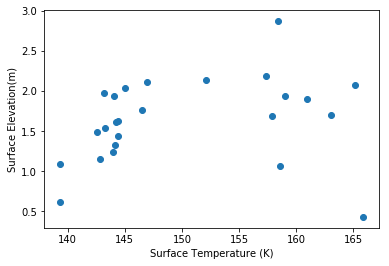

In [186]:
plt.scatter(T_surf_df_sample,Surf_elev_df_sample) #plotted sampled data (Surface temperature vs. Surface elevation)
plt.errorbar(T_surf_df_sample,Surf_elev_df_sample, xerr=T_surf_err_sample, fmt='|')
plt.xlabel('Surface Temperature (K)')
plt.ylabel('Surface Elevation(m)')
plt.show()

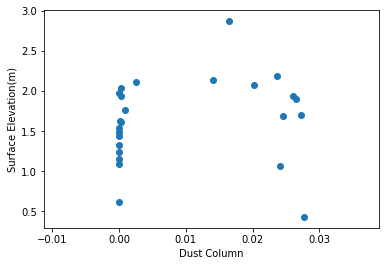

In [187]:
plt.scatter(Dust_column_df_sample,Surf_elev_df_sample) #plotted sampled data (Dust column vs. Surface elevation)
plt.errorbar(Dust_column_df_sample,Surf_elev_df_sample, xerr=Dust_column_err_df_sample, fmt='|')
plt.xlabel('Dust Column')
plt.ylabel('Surface Elevation(m)')
plt.show()

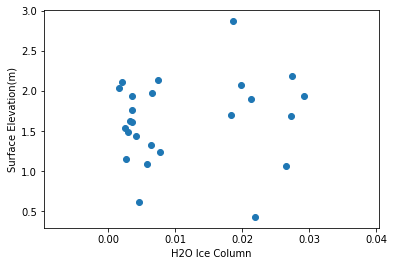

In [188]:
plt.scatter(H2Oice_column_df_sample,Surf_elev_df_sample) 
plt.errorbar(H2Oice_column_df_sample,Surf_elev_df_sample, xerr=H2Oice_column_err_df_sample, fmt='|')
plt.xlabel('H2O Ice Column')
plt.ylabel('Surface Elevation(m)')
plt.show()
#plotted sampled data (H2O Ice Column vs. Surface elevation)

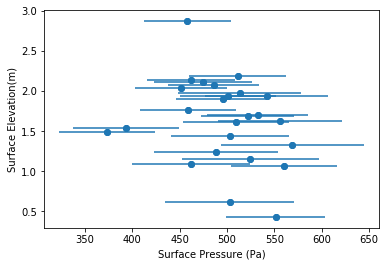

In [189]:
plt.scatter(p_surf_df_sample,Surf_elev_df_sample)
plt.errorbar(p_surf_df_sample,Surf_elev_df_sample, xerr=p_surf_err_df_sample, fmt='o')
plt.xlabel('Surface Pressure (Pa)')
plt.ylabel('Surface Elevation(m)')
plt.show()
#plotted sampled data (Surface pressure with error vs. Surface elevation)

In [190]:
new_df = df[((Surf_elev_df >= -3.632) & (Surf_elev_df  <= -3.631))] #viking 1
new_df2 = df[((Surf_elev_df >= -4.508) & (Surf_elev_df  <= -4.504))] #viking 2
#created 2 new dataframes constraining the initial dataframe to the altitudes of viking 1 & 2 

In [191]:
UTC_new_df = new_df['UTC']
MY_new_df = new_df['MY'] 
L_s_new_df = new_df['L_s']
LTST_new_df = new_df['LTST'] 
Surf_lat_new_df = new_df['Surf_lat'] 
Surf_lon_new_df = new_df['Surf_lon'] 
Surf_rad_new_df = new_df['Surf_rad'] 
Surf_elev_new_df = new_df['Surf_elev'] 
T_surf_new_df = new_df['T_surf'] 
T_surf_err_new_df = new_df['T_surf_err'] 
Dust_column_new_df = new_df['Dust_column'] 
Dust_column_err_new_df = new_df['Dust_column_err'] 
H2Oice_column_new_df = new_df['H2Oice_column']
H2Oice_column_err_new_df = new_df['H2Oice_column_err'] 
p_surf_new_df = new_df['p_surf'] 
p_surf_err_new_df = new_df['p_surf_err']
P_qual_new_df = new_df['P_qual'] 
T_qual_new_df = new_df['T_qual']
#for this I assigned the Dataframe columns to specific variables for Viking 1

In [192]:
UTC_new_df2 = new_df2['UTC'] 
MY_new_df2 = new_df2['MY'] 
L_s_new_df2 = new_df2['L_s']
LTST_new_df2 = new_df2['LTST'] 
Surf_lat_new_df2 = new_df2['Surf_lat'] 
Surf_lon_new_df2 = new_df2['Surf_lon'] 
Surf_rad_new_df2 = new_df2['Surf_rad'] 
Surf_elev_new_df2 = new_df2['Surf_elev'] 
T_surf_new_df2 = new_df2['T_surf'] 
T_surf_err_new_df2 = new_df2['T_surf_err'] 
Dust_column_new_df2 = new_df2['Dust_column'] 
Dust_column_err_new_df2 = new_df2['Dust_column_err'] 
H2Oice_column_new_df2 = new_df2['H2Oice_column']
H2Oice_column_err_new_df2 = new_df2['H2Oice_column_err'] 
p_surf_new_df2 = new_df2['p_surf'] 
p_surf_err_new_df2 = new_df2['p_surf_err']
P_qual_new_df2 = new_df2['P_qual'] 
T_qual_new_df2 = new_df2['T_qual']
#for this I assigned the Dataframe columns to specific variables for Viking 2

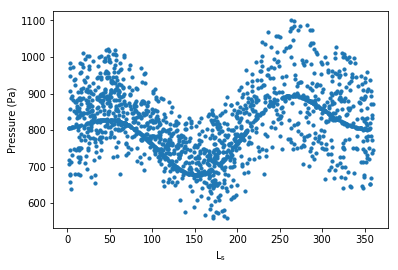

In [193]:
plt.scatter(L_s_new_df,p_surf_new_df, s = 10)
plt.ylabel('Pressure (Pa)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface pressure for viking 1 vs L_s

In [194]:
plt.scatter(L_s_new_df,T_surf_new_df, s = 10)
plt.ylabel('Temperature (K)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface temperature for viking 1 vs L_s

In [195]:
plt.scatter(L_s_new_df2,T_surf_new_df2, s = 10)
plt.ylabel('Temperature (K)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface temperature for viking 2 vs L_s

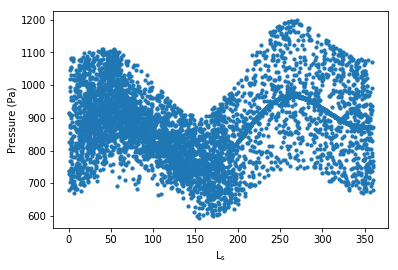

In [196]:
plt.scatter(L_s_new_df2,p_surf_new_df2,s = 10)
plt.ylabel('Pressure (Pa)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface pressure for viking 2 vs L_s

In [197]:
########
# pco2 #
########
# --------------------------------------------
# Equilibrium vapor pressure over solid CO2
# Brown and Ziegler (1980)
# --------------------------------------------
# Input:
#    T = temperature of solid [K]
# Output:
#    vapor pressure [Pa]
def pco2(T):
    A0 = 2.13807649e1
    A1 = -2.57064700e3
    A2 = -7.78129489e4
    A3 = 4.32506256e6
    A4 = -1.20671368e8
    A5 = 1.34966306e9
    # Pressure in torr
    ptorr = np.exp(A0 + (A1/(T)) + (A2/(T**2)) + (A3/(T**3)) + (A4/(T**4)) + (A5/(T**5)))
    # Pressure in Pa
    p = ptorr*133.3223684211
    return p

In [198]:
prep= (pco2(T_surf_new_df), p_surf_new_df, T_surf_new_df, L_s_new_df, Surf_lat_new_df, Surf_lon_new_df)
prep2 = (pco2(T_surf_new_df2),p_surf_new_df2, T_surf_new_df2,L_s_new_df2, Surf_lat_new_df2, Surf_lon_new_df2)
prep_pco2 = np.transpose(prep)
prep_pco2_2 = np.transpose(prep2)
#evaluated the previous function with the viking 1 temperatures and created a list that 
#contains pressure and temperature as well as L_s for graphing (prep) 
#evaluated the previous function with the viking 2 temperatures and created a list that 
#contains pressure and temperature as well as L_s for graphing (prep2) 

In [199]:
Viking1_EVP = pd.DataFrame(list(prep_pco2))
Viking1_EVP.columns = ['Eq_Vap_P','p_surf','T_surf', 'L_s' , 'Lat', 'Long']
Eq_Vap_P_Vik1 = Viking1_EVP['Eq_Vap_P']
p_surf_Vik1 = Viking1_EVP['p_surf']
T_surf_Vik1 = Viking1_EVP['T_surf']
L_s_Vik1 = Viking1_EVP['L_s']
Lat_Vik1 = Viking1_EVP['Lat']
Long_Vik1 = Viking1_EVP['Long']
#converted the previous list for viking 1 into a dataframe and converted the columns into variables

In [200]:
Viking2_EVP = pd.DataFrame(list(prep_pco2_2))
Viking2_EVP.columns = ['Eq_Vap_P','p_surf','T_surf', 'L_s' , 'Lat', 'Long']
Eq_Vap_P_Vik2 = Viking2_EVP['Eq_Vap_P']
p_surf_Vik2 = Viking2_EVP['p_surf']
T_surf_Vik2 = Viking2_EVP['T_surf']
L_s_Vik2 = Viking2_EVP['L_s']
Lat_Vik2 = Viking2_EVP['Lat']
Long_Vik2 = Viking2_EVP['Long']
#converted the previous list for viking 2 into a dataframe and converted the columns into variables

In [201]:
new_Viking1_EVP = Viking1_EVP[(Eq_Vap_P_Vik1 <= 650)]
new_Viking2_EVP = Viking2_EVP[(Eq_Vap_P_Vik2 <= 650)]
#converted the previous dataframes for viking 1 & 2 into two new dataframes with pressure constraints

In [202]:
New_Eq_Vap_P_Vik1 = new_Viking1_EVP['Eq_Vap_P']
New_T_surf_Vik1 = new_Viking1_EVP['T_surf']
New_p_surf_Vik1 = new_Viking1_EVP['p_surf']
New_L_s_Vik1 = new_Viking1_EVP['L_s']
New_Lat_Vik1 = new_Viking1_EVP['Lat']
New_Long_Vik1 = new_Viking1_EVP['Long']
#converted the columns of the constrained viking 1 dataframe into variables

In [203]:
New_Eq_Vap_P_Vik2 = new_Viking2_EVP['Eq_Vap_P']
New_T_surf_Vik2 = new_Viking2_EVP['T_surf']
New_p_surf_Vik2 = new_Viking2_EVP['p_surf']
New_L_s_Vik2 = new_Viking2_EVP['L_s']
New_Lat_Vik2 = new_Viking2_EVP['Lat']
New_Long_Vik2 = new_Viking2_EVP['Long']
#converted the columns of the constrained viking 2 dataframe into variables

In [204]:
plt.scatter(L_s_new_df,p_surf_new_df, s = 10)
plt.scatter(New_L_s_Vik1,New_p_surf_Vik1, s = 10)
plt.ylabel('Pressure (Pa)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface pressure for viking 1 with pressure constraint vs L_s

In [205]:
plt.scatter(L_s_new_df2,p_surf_new_df2, s = 10)
plt.scatter(New_L_s_Vik2,New_p_surf_Vik2, s = 10)
plt.ylabel('Pressure (Pa)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface pressure for viking 2 with pressure constraint vs L_s

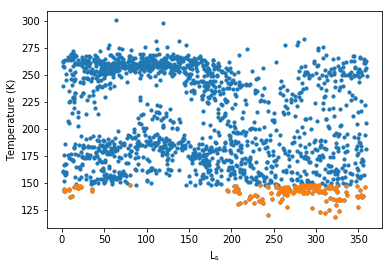

In [206]:
plt.scatter(L_s_new_df,T_surf_new_df, s = 10)
plt.scatter(New_L_s_Vik1,New_T_surf_Vik1, s = 10)
plt.ylabel('Temperature (K)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface temperature for viking 1 with pressure constraint vs L_s

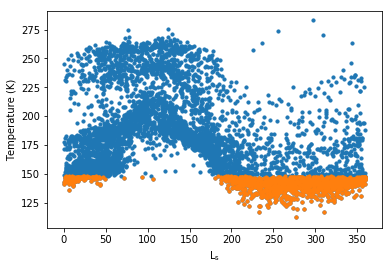

In [207]:
plt.scatter(L_s_new_df2,T_surf_new_df2, s = 10)
plt.scatter(New_L_s_Vik2,New_T_surf_Vik2, s = 10)
plt.ylabel('Temperature (K)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface temperature for viking 2 with pressure constraint vs L_s

In [208]:
new_df5 = df[((T_surf_df >= 273) & (T_surf_df <= 373) & (p_surf_df >= 600))]
# created dataframe with constrained data to satisfy conditions of liquid water

In [209]:
surflat = np.array(Surf_lat_df)
np.max(surflat)

89.528530000000003

In [210]:
new_df3 = df[((Surf_elev_df >= -3.632) & (Surf_elev_df  <= -3.631) & (T_surf_df >= 273) & (T_surf_df <= 373) & (p_surf_df >= 600))]
new_df4 = df[((Surf_elev_df >= -4.508) & (Surf_elev_df  <= -4.504) & (T_surf_df >= 273) & (T_surf_df <= 373) & (p_surf_df >= 600))]
#created dataframe with constrained data to satisfy conditions of liquid water with viking 1 and 2 altitudes

In [211]:
UTC_new_df3 = new_df3['UTC']
MY_new_df3 = new_df3['MY'] 
L_s_new_df3 = new_df3['L_s']
LTST_new_df3 = new_df3['LTST'] 
Surf_lat_new_df3 = new_df3['Surf_lat'] 
Surf_lon_new_df3 = new_df3['Surf_lon'] 
Surf_rad_new_df3= new_df3['Surf_rad'] 
Surf_elev_new_df3 = new_df3['Surf_elev'] 
T_surf_new_df3 = new_df3['T_surf'] 
T_surf_err_new_df3 = new_df3['T_surf_err'] 
Dust_column_new_df3 = new_df3['Dust_column'] 
Dust_column_err_new_df3 = new_df3['Dust_column_err'] 
H2Oice_column_new_df3 = new_df3['H2Oice_column']
H2Oice_column_err_new_df3 = new_df3['H2Oice_column_err'] 
p_surf_new_df3 = new_df3['p_surf'] 
p_surf_err_new_df3 = new_df3['p_surf_err']
P_qual_new_df3 = new_df3['P_qual'] 
T_qual_new_df3 = new_df3['T_qual']
#for this I assigned the Dataframe columns to specific variables for Viking 1 with liquid water conditions

In [212]:
UTC_new_df4 = new_df4['UTC']
MY_new_df4 = new_df4['MY'] 
L_s_new_df4 = new_df4['L_s']
LTST_new_df4 = new_df4['LTST'] 
Surf_lat_new_df4 = new_df4['Surf_lat'] 
Surf_lon_new_df4 = new_df4['Surf_lon'] 
Surf_rad_new_df4 = new_df4['Surf_rad'] 
Surf_elev_new_df4 = new_df4['Surf_elev'] 
T_surf_new_df4 = new_df4['T_surf'] 
T_surf_err_new_df4 = new_df4['T_surf_err'] 
Dust_column_new_df4 = new_df4['Dust_column'] 
Dust_column_err_new_df4 = new_df4['Dust_column_err'] 
H2Oice_column_new_df4 = new_df4['H2Oice_column']
H2Oice_column_err_new_df4 = new_df4['H2Oice_column_err'] 
p_surf_new_df4 = new_df4['p_surf'] 
p_surf_err_new_df4 = new_df4['p_surf_err']
P_qual_new_df4 = new_df4['P_qual'] 
T_qual_new_df4 = new_df4['T_qual']
#for this I assigned the Dataframe columns to specific variables for Viking 2 with liquid water conditions

In [213]:
UTC_new_df5 = new_df5['UTC']
MY_new_df5 = new_df5['MY'] 
L_s_new_df5 = new_df5['L_s']
LTST_new_df5 = new_df5['LTST'] 
Surf_lat_new_df5 = new_df5['Surf_lat'] 
Surf_lon_new_df5 = new_df5['Surf_lon'] 
Surf_rad_new_df5 = new_df5['Surf_rad'] 
Surf_elev_new_df5 = new_df5['Surf_elev'] 
T_surf_new_df5 = new_df5['T_surf'] 
T_surf_err_new_df5 = new_df5['T_surf_err'] 
Dust_column_new_df5 = new_df5['Dust_column'] 
Dust_column_err_new_df5 = new_df5['Dust_column_err'] 
H2Oice_column_new_df5 = new_df5['H2Oice_column']
H2Oice_column_err_new_df5 = new_df5['H2Oice_column_err'] 
p_surf_new_df5 = new_df5['p_surf'] 
p_surf_err_new_df5 = new_df5['p_surf_err']
P_qual_new_df5 = new_df5['P_qual'] 
T_qual_new_df5 = new_df5['T_qual']
#for this I assigned the Dataframe columns to specific variables for all data with liquid water conditions

In [214]:
len(L_s_new_df5) #data that satisfies liquid water conditions

55882

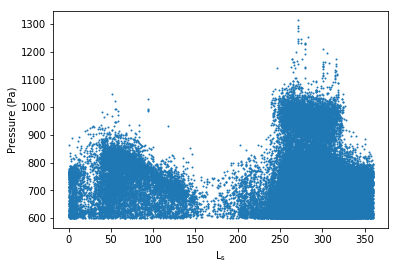

In [215]:
plt.scatter(L_s_new_df5,p_surf_new_df5,s = 1)
plt.ylabel('Pressure (Pa)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface pressure with liquid water conditions vs L_s 

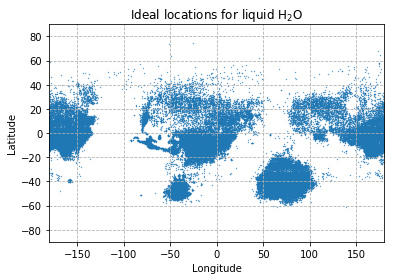

In [216]:
plt.scatter(Surf_lon_new_df5 ,Surf_lat_new_df5 ,s = 0.1)
plt.grid(linestyle='--')
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ideal locations for liquid $\mathregular{H_2O}$ ')
plt.show()
#plotted in a 2D map projection the points that satisfy liquid water conditions

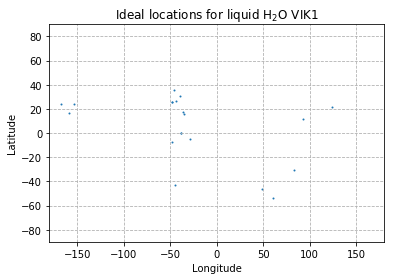

In [217]:
plt.scatter(Surf_lon_new_df3 ,Surf_lat_new_df3, s=1)
plt.grid(linestyle='--')
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ideal locations for liquid $\mathregular{H_2O}$ VIK1')
plt.show()
#plotted in a 2D map projection the points that satisfy liquid water conditions fro Viking 1

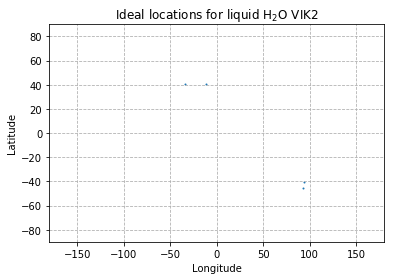

In [218]:
plt.scatter(Surf_lon_new_df4 ,Surf_lat_new_df4,s=1)
plt.grid(linestyle='--')
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ideal locations for liquid $\mathregular{H_2O}$ VIK2')
plt.show()
#plotted in a 2D map projection the points that satisfy liquid water conditions for Viking 2

In [219]:
cond = (pco2(T_surf_df), p_surf_df, T_surf_df, L_s_df, Surf_lat_df, Surf_lon_df, Dust_column_df, Surf_rad_df )
cond_right= np.transpose(cond)
#created a DataFrame using the empirical pressure formula and all of data from MCS

In [220]:
CO2 = pd.DataFrame(list(cond_right))
CO2.columns = ['Eq_Vap_P','p_surf','T_surf', 'L_s' , 'Lat', 'Long', 'Dust', 'Surf_rad']
Eq_Vap_P_CO2 = CO2['Eq_Vap_P']
p_surf_CO2 = CO2['p_surf']
T_surf_CO2 = CO2['T_surf']
L_s_CO2 = CO2['L_s']
Lat_CO2 = CO2['Lat']
Long_CO2 = CO2['Long']
Dust_column_CO2 =CO2['Dust']
Surf_rad_CO2 = CO2['Surf_rad']

#for this I assigned the Dataframe columns to specific variables based on the previous dataframe

In [221]:
new_CO2 = CO2[(Eq_Vap_P_CO2 <= 650)]
#constrained the previous Dataframe to a pressure that allows CO2 condensation

In [222]:
new_Eq_Vap_P_CO2 = new_CO2['Eq_Vap_P']
new_p_surf_CO2 = new_CO2['p_surf']
new_T_surf_CO2 = new_CO2['T_surf']
new_L_s_CO2= new_CO2['L_s']
new_Lat_CO2 = new_CO2['Lat']
new_Long_CO2 = new_CO2['Long']
new_Dust_column_CO2 = new_CO2['Dust']
new_Surf_rad_CO2 = new_CO2['Surf_rad']
#for this I assigned the Dataframe columns to specific variables based on the dataframe above

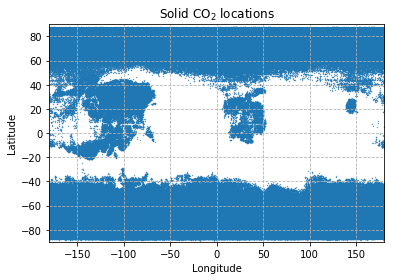

In [223]:
plt.scatter(new_Long_CO2, new_Lat_CO2, s = .1)
plt.grid(linestyle='--')
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Solid $\mathregular{CO_2}$ locations')
plt.show()
#plotted in a 2D map projection the points that satisfy solid CO2 conditions throughout the martian year

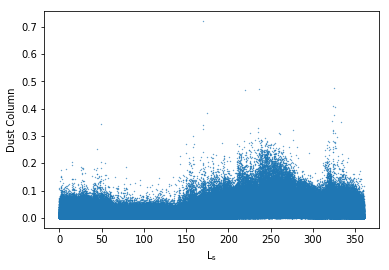

In [224]:
plt.scatter(new_L_s_CO2, new_Dust_column_CO2, s=.1)
plt.ylabel('Dust Column')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted dust column vs. L_s for CO2 frost point

In [225]:
new_CO2_NSP = CO2[(Eq_Vap_P_CO2 <= 650) & (L_s_CO2 <= 90)  & (L_s_CO2 >= 0)]
new_CO2_NSM = CO2[(Eq_Vap_P_CO2 <= 650) & (L_s_CO2 <= 180)  & (L_s_CO2 >= 90)]
new_CO2_NFA = CO2[(Eq_Vap_P_CO2 <= 650) & (L_s_CO2 <= 270)  & (L_s_CO2 >= 180)]
new_CO2_NWI = CO2[(Eq_Vap_P_CO2 <= 650) & (L_s_CO2 <= 360)  & (L_s_CO2 >= 270)]
#refined CO2 Dataframe to smaller dataframes dependent on seasons in Northern Hemisphere
#thus I had to make 4 different dataframes(1 per season based on the Northern Hemisphere)

In [226]:
new_Eq_Vap_P_CO2_NSP = new_CO2_NSP['Eq_Vap_P']
new_p_surf_CO2_NSP = new_CO2_NSP['p_surf']
new_T_surf_CO2_NSP = new_CO2_NSP['T_surf']
new_L_s_CO2_NSP = new_CO2_NSP['L_s']
new_Lat_CO2_NSP = new_CO2_NSP['Lat']
new_Long_CO2_NSP = new_CO2_NSP['Long']
new_Surf_rad_NSP = new_CO2_NSP['Surf_rad']
#created columns values for the Northern Spring

In [227]:
new_Eq_Vap_P_CO2_NSM = new_CO2_NSM['Eq_Vap_P']
new_p_surf_CO2_NSM = new_CO2_NSM['p_surf']
new_T_surf_CO2_NSM = new_CO2_NSM['T_surf']
new_L_s_CO2_NSM = new_CO2_NSM['L_s']
new_Lat_CO2_NSM = new_CO2_NSM['Lat']
new_Long_CO2_NSM = new_CO2_NSM['Long']
new_Surf_rad_NSM = new_CO2_NSM['Surf_rad']
#created columns values for the Northern Summer

In [228]:
new_Eq_Vap_P_CO2_NFA = new_CO2_NFA['Eq_Vap_P']
new_p_surf_CO2_NFA = new_CO2_NFA['p_surf']
new_T_surf_CO2_NFA = new_CO2_NFA['T_surf']
new_L_s_CO2_NFA = new_CO2_NFA['L_s']
new_Lat_CO2_NFA = new_CO2_NFA['Lat']
new_Long_CO2_NFA = new_CO2_NFA['Long']
new_Surf_rad_NFA = new_CO2_NFA['Surf_rad']
#created columns values for the Northern Fall

In [229]:
new_Eq_Vap_P_CO2_NWI = new_CO2_NWI['Eq_Vap_P']
new_p_surf_CO2_NWI = new_CO2_NWI['p_surf']
new_T_surf_CO2_NWI = new_CO2_NWI['T_surf']
new_L_s_CO2_NWI = new_CO2_NWI['L_s']
new_Lat_CO2_NWI = new_CO2_NWI['Lat']
new_Long_CO2_NWI = new_CO2_NWI['Long']
new_Surf_rad_NWI = new_CO2_NWI['Surf_rad']
#created columns values for the Northern Winter

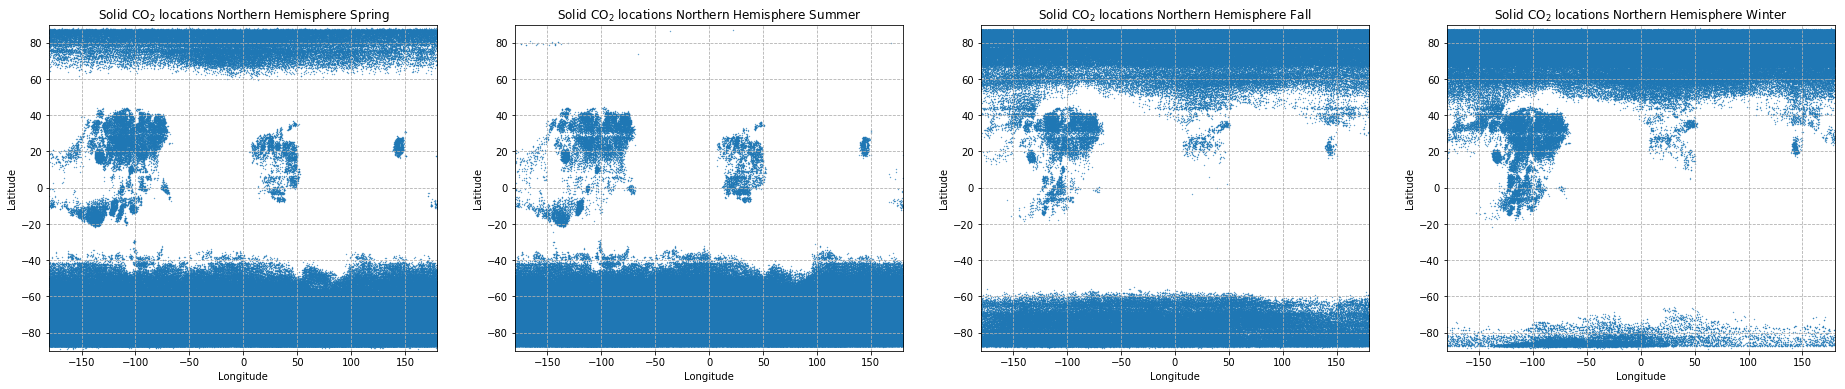

In [230]:
fig,axes = plt.subplots(1,4,sharex = True, sharey = False, figsize= (32,6)) 
plt.sca(axes[0])
plt.scatter(new_Long_CO2_NSP, new_Lat_CO2_NSP, s = .1)
plt.grid(linestyle='--')
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Solid $\mathregular{CO_2}$ locations Northern Hemisphere Spring')
plt.sca(axes[1])
plt.scatter(new_Long_CO2_NSM, new_Lat_CO2_NSM, s = .1)
plt.grid(linestyle='--')
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Solid $\mathregular{CO_2}$ locations Northern Hemisphere Summer')
plt.sca(axes[2])
plt.scatter(new_Long_CO2_NFA, new_Lat_CO2_NFA, s = .1)
plt.grid(linestyle='--')
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Solid $\mathregular{CO_2}$ locations Northern Hemisphere Fall')
plt.sca(axes[3])
plt.scatter(new_Long_CO2_NWI, new_Lat_CO2_NWI, s = .1)
plt.grid(linestyle='--')
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Solid $\mathregular{CO_2}$ locations Northern Hemisphere Winter')
plt.show
#created subplots of CO2 condensation for the four seasons of the martian year
filename = 'mcsSeasons.jpg'
plt.savefig(filename)  
#saved the image

In [231]:
new_CO2_north = CO2[(Eq_Vap_P_CO2 <= 650) & (Lat_CO2 <= 90) & (Lat_CO2 >= 0)]
new_CO2_south = CO2[(Eq_Vap_P_CO2 <= 650) & (Lat_CO2 <= 0) & (Lat_CO2 >= -90)]
#created 2 different dataframes based on hemisphere limitations from the original CO2 dataframe

In [232]:
north_Eq_Vap_P_CO2 = new_CO2_north['Eq_Vap_P']
north_p_surf_CO2 = new_CO2_north['p_surf']
north_T_surf_CO2 = new_CO2_north['T_surf']
north_L_s_CO2 = new_CO2_north['L_s']
north_Lat_CO2 = new_CO2_north['Lat']
north_Long_CO2 = new_CO2_north['Long']
north_Surf_rad_CO2 = new_CO2_north['Surf_rad']
#created columns for CO2 conditions for northern hemisphere dataframe 

In [233]:
south_Eq_Vap_P_CO2 = new_CO2_south['Eq_Vap_P']
south_p_surf_CO2 = new_CO2_south['p_surf']
south_T_surf_CO2 = new_CO2_south['T_surf']
south_L_s_CO2 = new_CO2_south['L_s']
south_Lat_CO2 = new_CO2_south['Lat']
south_Long_CO2 = new_CO2_south['Long']
south_Surf_rad_CO2 = new_CO2_south['Surf_rad']
#created columns for CO2 conditions for southern hemisphere dataframe 

In [234]:
NorthSpring = new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 90)  & (north_L_s_CO2 >= 0)]
NorthSummer = new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 180)  & (north_L_s_CO2 >= 90)]
NorthFall= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 270)  & (north_L_s_CO2 >= 180)]
NorthWinter = new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 360)  & (north_L_s_CO2 >= 270)]
#created four different dataframes based on the northern hemisphere seasons

In [235]:
SouthFall = new_CO2_south[(south_Eq_Vap_P_CO2<= 650) & (south_L_s_CO2 <= 90)  & (south_L_s_CO2 >= 0)]
SouthWinter = new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 180)  & (south_L_s_CO2 >= 90)]
SouthSpring= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 270)  & (south_L_s_CO2 >= 180)]
SouthSummer = new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2<= 360)  & (south_L_s_CO2 >= 270)]
#created four different dataframes based on the southern hemisphere seasons

In [236]:
Eq_Vap_P_CO2_NSP = NorthSpring['Eq_Vap_P']
p_surf_CO2_NSP = NorthSpring['p_surf']
T_surf_CO2_NSP = NorthSpring['T_surf']
L_s_CO2_NSP = NorthSpring['L_s']
Lat_CO2_NSP = NorthSpring['Lat']
Long_CO2_NSP = NorthSpring['Long']
Surf_rad_NSP = NorthSpring['Surf_rad']
#created columns for CO2 conditions for northern hemisphere spring dataframe 

In [237]:
Eq_Vap_P_CO2_NSM = NorthSummer['Eq_Vap_P']
p_surf_CO2_NSM = NorthSummer['p_surf']
T_surf_CO2_NSM = NorthSummer['T_surf']
L_s_CO2_NSM = NorthSummer['L_s']
Lat_CO2_NSM = NorthSummer['Lat']
Long_CO2_NSM = NorthSummer['Long']
Surf_rad_NSM = NorthSummer['Surf_rad']
#created columns for CO2 conditions for northern hemisphere summer dataframe 

In [238]:
Eq_Vap_P_CO2_NFA = NorthFall['Eq_Vap_P']
p_surf_CO2_NFA = NorthFall['p_surf']
T_surf_CO2_NFA = NorthFall['T_surf']
L_s_CO2_NFA = NorthFall['L_s']
Lat_CO2_NFA = NorthFall['Lat']
Long_CO2_NFA = NorthFall['Long']
Surf_rad_NFA = NorthFall['Surf_rad']
#created columns for CO2 conditions for northern hemisphere fall dataframe 

In [239]:
Eq_Vap_P_CO2_NWI = NorthWinter['Eq_Vap_P']
p_surf_CO2_NWI = NorthWinter['p_surf']
T_surf_CO2_NWI = NorthWinter['T_surf']
L_s_CO2_NWI = NorthWinter['L_s']
Lat_CO2_NWI = NorthWinter['Lat']
Long_CO2_NWI = NorthWinter['Long']
Surf_rad_NWI = NorthWinter['Surf_rad']
#created columns for CO2 conditions for northern hemisphere winter dataframe 

In [240]:
Eq_Vap_P_CO2_SFA = SouthFall['Eq_Vap_P']
p_surf_CO2_SFA = SouthFall['p_surf']
T_surf_CO2_SFA = SouthFall['T_surf']
L_s_CO2_SFA = SouthFall['L_s']
Lat_CO2_SFA = SouthFall['Lat']
Long_CO2_SFA = SouthFall['Long']
Surf_rad_SFA = SouthFall['Surf_rad']
#created columns for CO2 conditions for southern hemisphere fall dataframe 

In [241]:
Eq_Vap_P_CO2_SWI = SouthWinter['Eq_Vap_P']
p_surf_CO2_SWI = SouthWinter['p_surf']
T_surf_CO2_SWI = SouthWinter['T_surf']
L_s_CO2_SWI = SouthWinter['L_s']
Lat_CO2_SWI = SouthWinter['Lat']
Long_CO2_SWI = SouthWinter['Long']
Surf_rad_SWI = SouthWinter['Surf_rad']
#created columns for CO2 conditions for southern hemisphere winter dataframe 

In [242]:
Eq_Vap_P_CO2_SSP = SouthSpring['Eq_Vap_P']
p_surf_CO2_SSP = SouthSpring['p_surf']
T_surf_CO2_SSP = SouthSpring['T_surf']
L_s_CO2_SSP = SouthSpring['L_s']
Lat_CO2_SSP = SouthSpring['Lat']
Long_CO2_SSP = SouthSpring['Long']
Surf_rad_SSP = SouthSpring['Surf_rad']
#created columns for CO2 conditions for southern hemisphere spring dataframe 

In [243]:
Eq_Vap_P_CO2_SSM = SouthSummer['Eq_Vap_P']
p_surf_CO2_SSM = SouthSummer['p_surf']
T_surf_CO2_SSM = SouthSummer['T_surf']
L_s_CO2_SSM = SouthSummer['L_s']
Lat_CO2_SSM = SouthSummer['Lat']
Long_CO2_SSM = SouthSummer['Long']
Surf_rad_SSM = SouthSummer['Surf_rad']
#created columns for CO2 conditions for southern hemisphere summer dataframe 

In [244]:
Long_NSP = np.array(Long_CO2_NSP)
Lat_NSP = np.array(Lat_CO2_NSP)
Long_NSM = np.array(Long_CO2_NSM)
Lat_NSM = np.array(Lat_CO2_NSM)
Long_NFA = np.array(Long_CO2_NFA)
Lat_NFA = np.array(Lat_CO2_NFA)
Long_NWI = np.array(Long_CO2_NWI)
Lat_NWI = np.array(Lat_CO2_NWI)
Temp_NSP = np.array(T_surf_CO2_NSP)
Temp_NSM = np.array(T_surf_CO2_NSM)
Temp_NFA = np.array(T_surf_CO2_NFA)
Temp_NWI = np.array(T_surf_CO2_NWI)
#converted northern hemisphere seasonal temperatures, longitudes and latitudes into arrays for plotting

In [245]:
Long_SFA = np.array(Long_CO2_SFA)
Lat_SFA = np.array(Lat_CO2_SFA)
Long_SWI = np.array(Long_CO2_SWI)
Lat_SWI = np.array(Lat_CO2_SWI)
Long_SSP = np.array(Long_CO2_SSP)
Lat_SSP = np.array(Lat_CO2_SSP)
Long_SSM = np.array(Long_CO2_SSM)
Lat_SSM = np.array(Lat_CO2_SSM)
Temp_SFA = np.array(T_surf_CO2_SFA)
Temp_SWI = np.array(T_surf_CO2_SWI)
Temp_SSP = np.array(T_surf_CO2_SSP)
Temp_SSM = np.array(T_surf_CO2_SSM)
#converted southern hemisphere seasonal temperatures, longitudes and latitudes into arrays for plotting

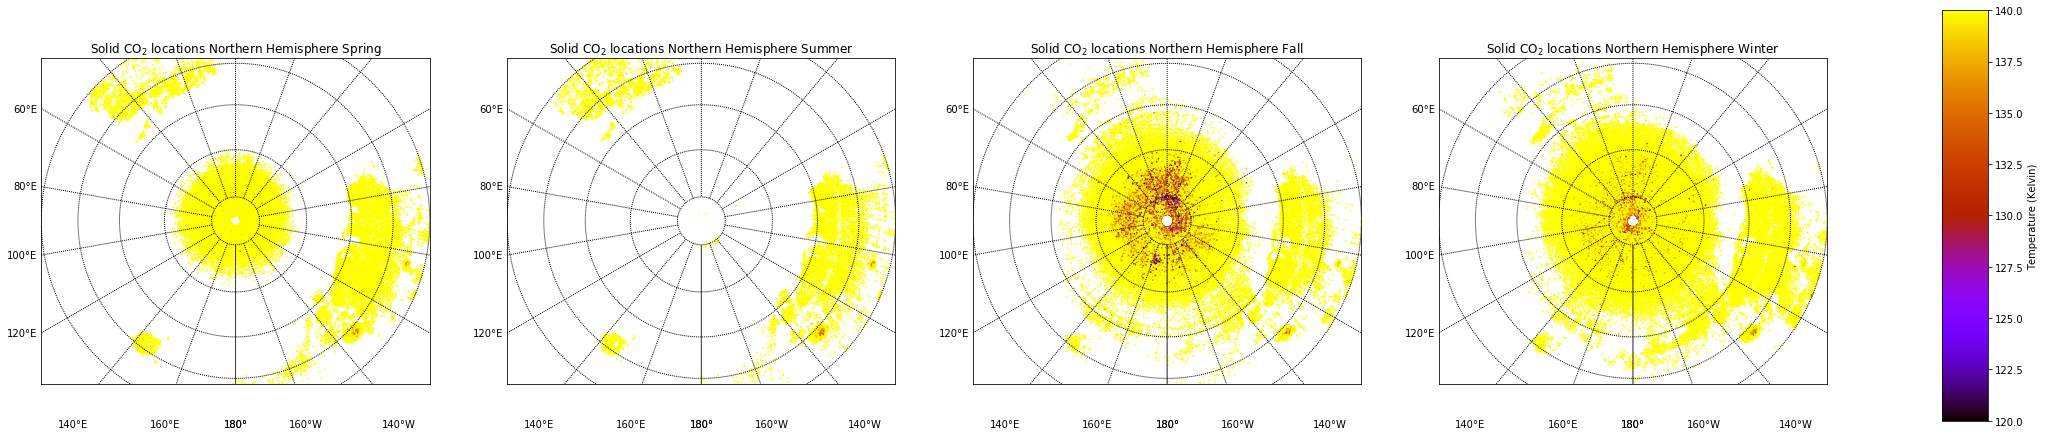

In [246]:
fig,axes = plt.subplots(1,4,sharex = True, sharey = False, figsize= (32,6))
plt.sca(axes[0])
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Solid $\mathregular{CO_2}$ locations Northern Hemisphere Spring')
x,y = m(Long_NSP,Lat_NSP)
s0 = m.scatter(x, y,c=Temp_NSP, cmap='gnuplot',  s=0.5, vmin = 120, vmax = 140)
plt.sca(axes[1])
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Solid $\mathregular{CO_2}$ locations Northern Hemisphere Summer')
x,y = m(Long_NSM,Lat_NSM)
s1 = m.scatter(x, y,c=Temp_NSM, cmap='gnuplot',  s=0.5, vmin = 120, vmax = 140)
plt.sca(axes[2])
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Solid $\mathregular{CO_2}$ locations Northern Hemisphere Fall')
x,y = m(Long_NFA,Lat_NFA)
s2 = m.scatter(x, y,c=Temp_NFA, cmap='gnuplot',  s=0.5, vmin = 120, vmax = 140)
plt.sca(axes[3])
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Solid $\mathregular{CO_2}$ locations Northern Hemisphere Winter')
x,y = m(Long_NWI,Lat_NWI)
s3 = m.scatter(x, y,c=Temp_NWI, cmap='gnuplot',  s=0.5, vmin = 120, vmax = 140)
#nplaea = north polar lambert azimuthal
#plotted the north hemisphere seasonal condensation of CO2 with temperature and the above projection
cbx = fig.add_axes([0.95, 0.04, 0.02, 0.95])
ca = fig.colorbar(s3, cbx)
ca.set_label('Temperature (Kelvin)')
#created a color bar
filename3 = 'mcsSeasonsNorthT.jpg'
plt.savefig(filename3) 
#saved the plot as an image

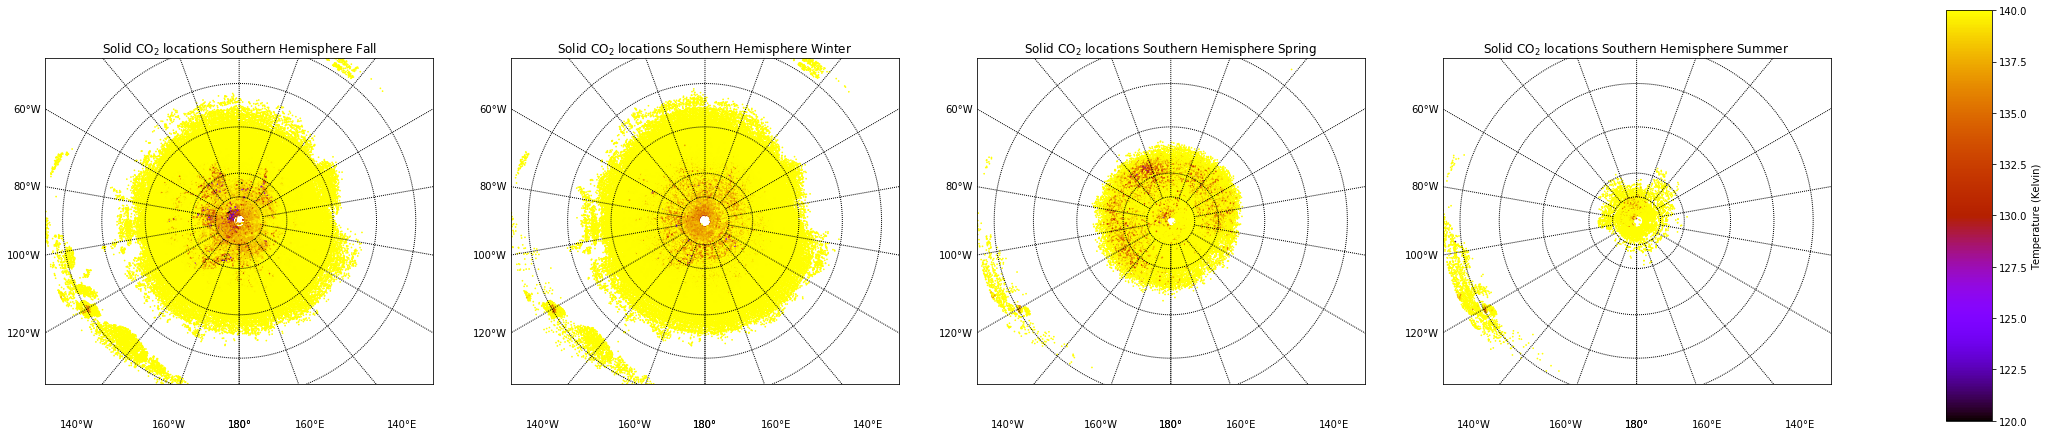

In [247]:
fig,axes = plt.subplots(1,4,sharex = True, sharey = False, figsize= (32,6))
plt.sca(axes[0])
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Solid $\mathregular{CO_2}$ locations Southern Hemisphere Fall')
x,y = m(Long_SFA,Lat_SFA)
t0 = m.scatter(x, y,c=Temp_SFA, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.sca(axes[1])
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Solid $\mathregular{CO_2}$ locations Southern Hemisphere Winter')
x,y = m(Long_SWI,Lat_SWI)
t1 =m.scatter(x, y, c=Temp_SWI, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.sca(axes[2])
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Solid $\mathregular{CO_2}$ locations Southern Hemisphere Spring')
x,y = m(Long_SSP,Lat_SSP)
t2 =m.scatter(x, y, c=Temp_SSP, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.sca(axes[3])
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Solid $\mathregular{CO_2}$ locations Southern Hemisphere Summer')
x,y = m(Long_SSM,Lat_SSM)
t3 = m.scatter(x, y,c=Temp_SSM, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
#splaea = south polar lambert azimuthal
#plotted the south hemisphere seasonal condensation of CO2 with temperature and the above projection
cax = fig.add_axes([0.95, 0.04, 0.02, 0.95])
cb = fig.colorbar(t3, cax)
cb.set_label('Temperature (Kelvin)')
#created a color bar
filename2 = 'mcsSeasonsSouthT.jpg'
plt.savefig(filename2) 
#saved the plot into an image

In [248]:
#I subdivided the previous DataFrames based on periods of 15 L_s for the Northern Hemisphere
new_CO2_north_SUB = new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 15)  & (north_L_s_CO2 >= 0)]
new_CO2_north_SUB2= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 30)  & (north_L_s_CO2 >= 15)]
new_CO2_north_SUB3= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 45)  & (north_L_s_CO2 >= 30)]
new_CO2_north_SUB4= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 60)  & (north_L_s_CO2 >= 45)]
new_CO2_north_SUB5= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 75)  & (north_L_s_CO2 >= 60)]
new_CO2_north_SUB6= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 90)  & (north_L_s_CO2 >= 75)]
new_CO2_north_SUB7= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 105)  & (north_L_s_CO2 >= 90)]
new_CO2_north_SUB8= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 120)  & (north_L_s_CO2 >= 105)]
new_CO2_north_SUB9= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 135)  & (north_L_s_CO2 >= 120)]
new_CO2_north_SUB10= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 150)  & (north_L_s_CO2 >= 135)]
new_CO2_north_SUB11= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 165)  & (north_L_s_CO2 >= 150)]
new_CO2_north_SUB12= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 180)  & (north_L_s_CO2 >= 165)]
new_CO2_north_SUB13= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 195)  & (north_L_s_CO2 >= 180)]
new_CO2_north_SUB14= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 210)  & (north_L_s_CO2 >= 195)]
new_CO2_north_SUB15= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 225)  & (north_L_s_CO2 >= 210)]
new_CO2_north_SUB16= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 240)  & (north_L_s_CO2 >= 225)]
new_CO2_north_SUB17= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 255)  & (north_L_s_CO2 >= 240)]
new_CO2_north_SUB18= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 270)  & (north_L_s_CO2 >= 255)]
new_CO2_north_SUB19= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 285)  & (north_L_s_CO2 >= 270)]
new_CO2_north_SUB20= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 300)  & (north_L_s_CO2 >= 285)]
new_CO2_north_SUB21= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 315)  & (north_L_s_CO2 >= 300)]
new_CO2_north_SUB22= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 330)  & (north_L_s_CO2 >= 315)]
new_CO2_north_SUB23= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 345)  & (north_L_s_CO2 >= 330)]
new_CO2_north_SUB24= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 360)  & (north_L_s_CO2 >= 345)]

In [249]:
# Renamed each column in the new dataframe created above(Northern Hemisphere)
NEq_Vap_P_CO2_SUB = new_CO2_north_SUB['Eq_Vap_P']
Np_surf_CO2_SUB = new_CO2_north_SUB['p_surf']
NT_surf_CO2_SUB = new_CO2_north_SUB['T_surf']
NL_s_CO2_SUB = new_CO2_north_SUB['L_s']
NLat_CO2_SUB = new_CO2_north_SUB['Lat']
NLong_CO2_SUB = new_CO2_north_SUB['Long']

NEq_Vap_P_CO2_SUB2 = new_CO2_north_SUB2['Eq_Vap_P']
Np_surf_CO2_SUB2 = new_CO2_north_SUB2['p_surf']
NT_surf_CO2_SUB2 = new_CO2_north_SUB2['T_surf']
NL_s_CO2_SUB2 = new_CO2_north_SUB2['L_s']
NLat_CO2_SUB2 = new_CO2_north_SUB2['Lat']
NLong_CO2_SUB2 = new_CO2_north_SUB2['Long']

NEq_Vap_P_CO2_SUB3 = new_CO2_north_SUB3['Eq_Vap_P']
Np_surf_CO2_SUB3 = new_CO2_north_SUB3['p_surf']
NT_surf_CO2_SUB3 = new_CO2_north_SUB3['T_surf']
NL_s_CO2_SUB3 = new_CO2_north_SUB3['L_s']
NLat_CO2_SUB3 = new_CO2_north_SUB3['Lat']
NLong_CO2_SUB3 = new_CO2_north_SUB3['Long']

NEq_Vap_P_CO2_SUB4 = new_CO2_north_SUB4['Eq_Vap_P']
Np_surf_CO2_SUB4 = new_CO2_north_SUB4['p_surf']
NT_surf_CO2_SUB4 = new_CO2_north_SUB4['T_surf']
NL_s_CO2_SUB4 = new_CO2_north_SUB4['L_s']
NLat_CO2_SUB4 = new_CO2_north_SUB4['Lat']
NLong_CO2_SUB4 = new_CO2_north_SUB4['Long']

NEq_Vap_P_CO2_SUB5 = new_CO2_north_SUB5['Eq_Vap_P']
Np_surf_CO2_SUB5 = new_CO2_north_SUB5['p_surf']
NT_surf_CO2_SUB5 = new_CO2_north_SUB5['T_surf']
NL_s_CO2_SUB5 = new_CO2_north_SUB5['L_s']
NLat_CO2_SUB5 = new_CO2_north_SUB5['Lat']
NLong_CO2_SUB5 = new_CO2_north_SUB5['Long']

NEq_Vap_P_CO2_SUB6 = new_CO2_north_SUB6['Eq_Vap_P']
Np_surf_CO2_SUB6 = new_CO2_north_SUB6['p_surf']
NT_surf_CO2_SUB6 = new_CO2_north_SUB6['T_surf']
NL_s_CO2_SUB6 = new_CO2_north_SUB6['L_s']
NLat_CO2_SUB6 = new_CO2_north_SUB6['Lat']
NLong_CO2_SUB6 = new_CO2_north_SUB6['Long']

NEq_Vap_P_CO2_SUB7 = new_CO2_north_SUB7['Eq_Vap_P']
Np_surf_CO2_SUB7 = new_CO2_north_SUB7['p_surf']
NT_surf_CO2_SUB7 = new_CO2_north_SUB7['T_surf']
NL_s_CO2_SUB7 = new_CO2_north_SUB7['L_s']
NLat_CO2_SUB7 = new_CO2_north_SUB7['Lat']
NLong_CO2_SUB7 = new_CO2_north_SUB7['Long']

NEq_Vap_P_CO2_SUB8 = new_CO2_north_SUB8['Eq_Vap_P']
Np_surf_CO2_SUB8 = new_CO2_north_SUB8['p_surf']
NT_surf_CO2_SUB8 = new_CO2_north_SUB8['T_surf']
NL_s_CO2_SUB8 = new_CO2_north_SUB8['L_s']
NLat_CO2_SUB8 = new_CO2_north_SUB8['Lat']
NLong_CO2_SUB8 = new_CO2_north_SUB8['Long']

NEq_Vap_P_CO2_SUB9 = new_CO2_north_SUB9['Eq_Vap_P']
Np_surf_CO2_SUB9 = new_CO2_north_SUB9['p_surf']
NT_surf_CO2_SUB9 = new_CO2_north_SUB9['T_surf']
NL_s_CO2_SUB9 = new_CO2_north_SUB9['L_s']
NLat_CO2_SUB9 = new_CO2_north_SUB9['Lat']
NLong_CO2_SUB9 = new_CO2_north_SUB9['Long']

NEq_Vap_P_CO2_SUB10 = new_CO2_north_SUB10['Eq_Vap_P']
Np_surf_CO2_SUB10 = new_CO2_north_SUB10['p_surf']
NT_surf_CO2_SUB10 = new_CO2_north_SUB10['T_surf']
NL_s_CO2_SUB10 = new_CO2_north_SUB10['L_s']
NLat_CO2_SUB10 = new_CO2_north_SUB10['Lat']
NLong_CO2_SUB10 = new_CO2_north_SUB10['Long']

NEq_Vap_P_CO2_SUB11 = new_CO2_north_SUB11['Eq_Vap_P']
Np_surf_CO2_SUB11 = new_CO2_north_SUB11['p_surf']
NT_surf_CO2_SUB11 = new_CO2_north_SUB11['T_surf']
NL_s_CO2_SUB11 = new_CO2_north_SUB11['L_s']
NLat_CO2_SUB11 = new_CO2_north_SUB11['Lat']
NLong_CO2_SUB11 = new_CO2_north_SUB11['Long']

NEq_Vap_P_CO2_SUB12 = new_CO2_north_SUB12['Eq_Vap_P']
Np_surf_CO2_SUB12 = new_CO2_north_SUB12['p_surf']
NT_surf_CO2_SUB12 = new_CO2_north_SUB12['T_surf']
NL_s_CO2_SUB12 = new_CO2_north_SUB12['L_s']
NLat_CO2_SUB12 = new_CO2_north_SUB12['Lat']
NLong_CO2_SUB12 = new_CO2_north_SUB12['Long']

NEq_Vap_P_CO2_SUB13 = new_CO2_north_SUB13['Eq_Vap_P']
Np_surf_CO2_SUB13 = new_CO2_north_SUB13['p_surf']
NT_surf_CO2_SUB13 = new_CO2_north_SUB13['T_surf']
NL_s_CO2_SUB13 = new_CO2_north_SUB13['L_s']
NLat_CO2_SUB13 = new_CO2_north_SUB13['Lat']
NLong_CO2_SUB13 = new_CO2_north_SUB13['Long']

NEq_Vap_P_CO2_SUB14 = new_CO2_north_SUB14['Eq_Vap_P']
Np_surf_CO2_SUB14 = new_CO2_north_SUB14['p_surf']
NT_surf_CO2_SUB14 = new_CO2_north_SUB14['T_surf']
NL_s_CO2_SUB14= new_CO2_north_SUB14['L_s']
NLat_CO2_SUB14 = new_CO2_north_SUB14['Lat']
NLong_CO2_SUB14 = new_CO2_north_SUB14['Long']

NEq_Vap_P_CO2_SUB15 = new_CO2_north_SUB15['Eq_Vap_P']
Np_surf_CO2_SUB15 = new_CO2_north_SUB15['p_surf']
NT_surf_CO2_SUB15 = new_CO2_north_SUB15['T_surf']
NL_s_CO2_SUB15 = new_CO2_north_SUB15['L_s']
NLat_CO2_SUB15 = new_CO2_north_SUB15['Lat']
NLong_CO2_SUB15 = new_CO2_north_SUB15['Long']

NEq_Vap_P_CO2_SUB16 = new_CO2_north_SUB16['Eq_Vap_P']
Np_surf_CO2_SUB16 = new_CO2_north_SUB16['p_surf']
NT_surf_CO2_SUB16 = new_CO2_north_SUB16['T_surf']
NL_s_CO2_SUB16 = new_CO2_north_SUB16['L_s']
NLat_CO2_SUB16 = new_CO2_north_SUB16['Lat']
NLong_CO2_SUB16 = new_CO2_north_SUB16['Long']

NEq_Vap_P_CO2_SUB17 = new_CO2_north_SUB17['Eq_Vap_P']
Np_surf_CO2_SUB17 = new_CO2_north_SUB17['p_surf']
NT_surf_CO2_SUB17 = new_CO2_north_SUB17['T_surf']
NL_s_CO2_SUB17 = new_CO2_north_SUB17['L_s']
NLat_CO2_SUB17 = new_CO2_north_SUB17['Lat']
NLong_CO2_SUB17 = new_CO2_north_SUB17['Long']

NEq_Vap_P_CO2_SUB18 = new_CO2_north_SUB18['Eq_Vap_P']
Np_surf_CO2_SUB18 = new_CO2_north_SUB18['p_surf']
NT_surf_CO2_SUB18 = new_CO2_north_SUB18['T_surf']
NL_s_CO2_SUB18 = new_CO2_north_SUB18['L_s']
NLat_CO2_SUB18 = new_CO2_north_SUB18['Lat']
NLong_CO2_SUB18 = new_CO2_north_SUB18['Long']

NEq_Vap_P_CO2_SUB19 = new_CO2_north_SUB19['Eq_Vap_P']
Np_surf_CO2_SUB19 = new_CO2_north_SUB19['p_surf']
NT_surf_CO2_SUB19 = new_CO2_north_SUB19['T_surf']
NL_s_CO2_SUB19 = new_CO2_north_SUB19['L_s']
NLat_CO2_SUB19 = new_CO2_north_SUB19['Lat']
NLong_CO2_SUB19 = new_CO2_north_SUB19['Long']

NEq_Vap_P_CO2_SUB20 = new_CO2_north_SUB20['Eq_Vap_P']
Np_surf_CO2_SUB20 = new_CO2_north_SUB20['p_surf']
NT_surf_CO2_SUB20 = new_CO2_north_SUB20['T_surf']
NL_s_CO2_SUB20 = new_CO2_north_SUB20['L_s']
NLat_CO2_SUB20 = new_CO2_north_SUB20['Lat']
NLong_CO2_SUB20 = new_CO2_north_SUB20['Long']

NEq_Vap_P_CO2_SUB21 = new_CO2_north_SUB21['Eq_Vap_P']
Np_surf_CO2_SUB21 = new_CO2_north_SUB21['p_surf']
NT_surf_CO2_SUB21 = new_CO2_north_SUB21['T_surf']
NL_s_CO2_SUB21 = new_CO2_north_SUB21['L_s']
NLat_CO2_SUB21 = new_CO2_north_SUB21['Lat']
NLong_CO2_SUB21 = new_CO2_north_SUB21['Long']

NEq_Vap_P_CO2_SUB22 = new_CO2_north_SUB22['Eq_Vap_P']
Np_surf_CO2_SUB22 = new_CO2_north_SUB22['p_surf']
NT_surf_CO2_SUB22 = new_CO2_north_SUB22['T_surf']
NL_s_CO2_SUB22 = new_CO2_north_SUB22['L_s']
NLat_CO2_SUB22 = new_CO2_north_SUB22['Lat']
NLong_CO2_SUB22 = new_CO2_north_SUB22['Long']

NEq_Vap_P_CO2_SUB23 = new_CO2_north_SUB23['Eq_Vap_P']
Np_surf_CO2_SUB23 = new_CO2_north_SUB23['p_surf']
NT_surf_CO2_SUB23 = new_CO2_north_SUB23['T_surf']
NL_s_CO2_SUB23 = new_CO2_north_SUB23['L_s']
NLat_CO2_SUB23 = new_CO2_north_SUB23['Lat']
NLong_CO2_SUB23 = new_CO2_north_SUB23['Long']

NEq_Vap_P_CO2_SUB24 = new_CO2_north_SUB24['Eq_Vap_P']
Np_surf_CO2_SUB24 = new_CO2_north_SUB24['p_surf']
NT_surf_CO2_SUB24 = new_CO2_north_SUB24['T_surf']
NL_s_CO2_SUB24 = new_CO2_north_SUB24['L_s']
NLat_CO2_SUB24 = new_CO2_north_SUB24['Lat']
NLong_CO2_SUB24 = new_CO2_north_SUB24['Long']

In [250]:
#I subdivided the previous DataFrames based on periods of 15 L_s for the Southern Hemisphere
new_CO2_south_SUB = new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 15)  & (south_L_s_CO2 >= 0)]
new_CO2_south_SUB2= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 30)  & (south_L_s_CO2 >= 15)]
new_CO2_south_SUB3= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 45)  & (south_L_s_CO2 >= 30)]
new_CO2_south_SUB4= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 60)  & (south_L_s_CO2 >= 45)]
new_CO2_south_SUB5= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 75)  & (south_L_s_CO2 >= 60)]
new_CO2_south_SUB6= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 90)  & (south_L_s_CO2 >= 75)]
new_CO2_south_SUB7= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 105)  & (south_L_s_CO2 >= 90)]
new_CO2_south_SUB8= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 120)  & (south_L_s_CO2 >= 105)]
new_CO2_south_SUB9= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 135)  & (south_L_s_CO2 >= 120)]
new_CO2_south_SUB10= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 150)  & (south_L_s_CO2 >= 135)]
new_CO2_south_SUB11= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 165)  & (south_L_s_CO2 >= 150)]
new_CO2_south_SUB12= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 180)  & (south_L_s_CO2 >= 165)]
new_CO2_south_SUB13= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 195)  & (south_L_s_CO2 >= 180)]
new_CO2_south_SUB14= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 210)  & (south_L_s_CO2 >= 195)]
new_CO2_south_SUB15= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 225)  & (south_L_s_CO2 >= 210)]
new_CO2_south_SUB16= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 240)  & (south_L_s_CO2 >= 225)]
new_CO2_south_SUB17= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 255)  & (south_L_s_CO2 >= 240)]
new_CO2_south_SUB18= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 270)  & (south_L_s_CO2 >= 255)]
new_CO2_south_SUB19= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 285)  & (south_L_s_CO2 >= 270)]
new_CO2_south_SUB20= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 300)  & (south_L_s_CO2 >= 285)]
new_CO2_south_SUB21= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 315)  & (south_L_s_CO2 >= 300)]
new_CO2_south_SUB22= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 330)  & (south_L_s_CO2 >= 315)]
new_CO2_south_SUB23= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 345)  & (south_L_s_CO2 >= 330)]
new_CO2_south_SUB24= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 360)  & (south_L_s_CO2 >= 345)]

In [251]:
# Renamed each column in the new dataframe created above(Southern Hemisphere)
SEq_Vap_P_CO2_SUB = new_CO2_south_SUB['Eq_Vap_P']
Sp_surf_CO2_SUB = new_CO2_south_SUB['p_surf']
ST_surf_CO2_SUB = new_CO2_south_SUB['T_surf']
SL_s_CO2_SUB = new_CO2_south_SUB['L_s']
SLat_CO2_SUB = new_CO2_south_SUB['Lat']
SLong_CO2_SUB = new_CO2_south_SUB['Long']

SEq_Vap_P_CO2_SUB2 = new_CO2_south_SUB2['Eq_Vap_P']
Sp_surf_CO2_SUB2 = new_CO2_south_SUB2['p_surf']
ST_surf_CO2_SUB2 = new_CO2_south_SUB2['T_surf']
SL_s_CO2_SUB2 = new_CO2_south_SUB2['L_s']
SLat_CO2_SUB2 = new_CO2_south_SUB2['Lat']
SLong_CO2_SUB2 = new_CO2_south_SUB2['Long']

SEq_Vap_P_CO2_SUB3 = new_CO2_south_SUB3['Eq_Vap_P']
Sp_surf_CO2_SUB3 = new_CO2_south_SUB3['p_surf']
ST_surf_CO2_SUB3 = new_CO2_south_SUB3['T_surf']
SL_s_CO2_SUB3 = new_CO2_south_SUB3['L_s']
SLat_CO2_SUB3 = new_CO2_south_SUB3['Lat']
SLong_CO2_SUB3 = new_CO2_south_SUB3['Long']

SEq_Vap_P_CO2_SUB4 = new_CO2_south_SUB4['Eq_Vap_P']
Sp_surf_CO2_SUB4 = new_CO2_south_SUB4['p_surf']
ST_surf_CO2_SUB4 = new_CO2_south_SUB4['T_surf']
SL_s_CO2_SUB4 = new_CO2_south_SUB4['L_s']
SLat_CO2_SUB4 = new_CO2_south_SUB4['Lat']
SLong_CO2_SUB4 = new_CO2_south_SUB4['Long']

SEq_Vap_P_CO2_SUB5 = new_CO2_south_SUB5['Eq_Vap_P']
Sp_surf_CO2_SUB5 = new_CO2_south_SUB5['p_surf']
ST_surf_CO2_SUB5 = new_CO2_south_SUB5['T_surf']
SL_s_CO2_SUB5 = new_CO2_south_SUB5['L_s']
SLat_CO2_SUB5 = new_CO2_south_SUB5['Lat']
SLong_CO2_SUB5 = new_CO2_south_SUB5['Long']

SEq_Vap_P_CO2_SUB6 = new_CO2_south_SUB6['Eq_Vap_P']
Sp_surf_CO2_SUB6 = new_CO2_south_SUB6['p_surf']
ST_surf_CO2_SUB6 = new_CO2_south_SUB6['T_surf']
SL_s_CO2_SUB6 = new_CO2_south_SUB6['L_s']
SLat_CO2_SUB6 = new_CO2_south_SUB6['Lat']
SLong_CO2_SUB6 = new_CO2_south_SUB6['Long']

SEq_Vap_P_CO2_SUB7 = new_CO2_south_SUB7['Eq_Vap_P']
Sp_surf_CO2_SUB7 = new_CO2_south_SUB7['p_surf']
ST_surf_CO2_SUB7 = new_CO2_south_SUB7['T_surf']
SL_s_CO2_SUB7 = new_CO2_south_SUB7['L_s']
SLat_CO2_SUB7 = new_CO2_south_SUB7['Lat']
SLong_CO2_SUB7 = new_CO2_south_SUB7['Long']

SEq_Vap_P_CO2_SUB8 = new_CO2_south_SUB8['Eq_Vap_P']
Sp_surf_CO2_SUB8 = new_CO2_south_SUB8['p_surf']
ST_surf_CO2_SUB8 = new_CO2_south_SUB8['T_surf']
SL_s_CO2_SUB8 = new_CO2_south_SUB8['L_s']
SLat_CO2_SUB8 = new_CO2_south_SUB8['Lat']
SLong_CO2_SUB8 = new_CO2_south_SUB8['Long']

SEq_Vap_P_CO2_SUB9 = new_CO2_south_SUB9['Eq_Vap_P']
Sp_surf_CO2_SUB9 = new_CO2_south_SUB9['p_surf']
ST_surf_CO2_SUB9 = new_CO2_south_SUB9['T_surf']
SL_s_CO2_SUB9 = new_CO2_south_SUB9['L_s']
SLat_CO2_SUB9 = new_CO2_south_SUB9['Lat']
SLong_CO2_SUB9 = new_CO2_south_SUB9['Long']
SEq_Vap_P_CO2_SUB10 = new_CO2_south_SUB10['Eq_Vap_P']
Sp_surf_CO2_SUB10 = new_CO2_south_SUB10['p_surf']
ST_surf_CO2_SUB10 = new_CO2_south_SUB10['T_surf']
SL_s_CO2_SUB10 = new_CO2_south_SUB10['L_s']
SLat_CO2_SUB10 = new_CO2_south_SUB10['Lat']
SLong_CO2_SUB10 = new_CO2_south_SUB10['Long']

SEq_Vap_P_CO2_SUB11 = new_CO2_south_SUB11['Eq_Vap_P']
Sp_surf_CO2_SUB11 = new_CO2_south_SUB11['p_surf']
ST_surf_CO2_SUB11 = new_CO2_south_SUB11['T_surf']
SL_s_CO2_SUB11 = new_CO2_south_SUB11['L_s']
SLat_CO2_SUB11 = new_CO2_south_SUB11['Lat']
SLong_CO2_SUB11 = new_CO2_south_SUB11['Long']

SEq_Vap_P_CO2_SUB12 = new_CO2_south_SUB12['Eq_Vap_P']
Sp_surf_CO2_SUB12 = new_CO2_south_SUB12['p_surf']
ST_surf_CO2_SUB12 = new_CO2_south_SUB12['T_surf']
SL_s_CO2_SUB12 = new_CO2_south_SUB12['L_s']
SLat_CO2_SUB12 = new_CO2_south_SUB12['Lat']
SLong_CO2_SUB12 = new_CO2_south_SUB12['Long']

SEq_Vap_P_CO2_SUB13 = new_CO2_south_SUB13['Eq_Vap_P']
Sp_surf_CO2_SUB13 = new_CO2_south_SUB13['p_surf']
ST_surf_CO2_SUB13 = new_CO2_south_SUB13['T_surf']
SL_s_CO2_SUB13 = new_CO2_south_SUB13['L_s']
SLat_CO2_SUB13 = new_CO2_south_SUB13['Lat']
SLong_CO2_SUB13 = new_CO2_south_SUB13['Long']

SEq_Vap_P_CO2_SUB14 = new_CO2_south_SUB14['Eq_Vap_P']
Sp_surf_CO2_SUB14 = new_CO2_south_SUB14['p_surf']
ST_surf_CO2_SUB14 = new_CO2_south_SUB14['T_surf']
SL_s_CO2_SUB14= new_CO2_south_SUB14['L_s']
SLat_CO2_SUB14 = new_CO2_south_SUB14['Lat']
SLong_CO2_SUB14 = new_CO2_south_SUB14['Long']

SEq_Vap_P_CO2_SUB15 = new_CO2_south_SUB15['Eq_Vap_P']
Sp_surf_CO2_SUB15 = new_CO2_south_SUB15['p_surf']
ST_surf_CO2_SUB15 = new_CO2_south_SUB15['T_surf']
SL_s_CO2_SUB15 = new_CO2_south_SUB15['L_s']
SLat_CO2_SUB15 = new_CO2_south_SUB15['Lat']
SLong_CO2_SUB15 = new_CO2_south_SUB15['Long']

SEq_Vap_P_CO2_SUB16 = new_CO2_south_SUB16['Eq_Vap_P']
Sp_surf_CO2_SUB16 = new_CO2_south_SUB16['p_surf']
ST_surf_CO2_SUB16 = new_CO2_south_SUB16['T_surf']
SL_s_CO2_SUB16 = new_CO2_south_SUB16['L_s']
SLat_CO2_SUB16 = new_CO2_south_SUB16['Lat']
SLong_CO2_SUB16 = new_CO2_south_SUB16['Long']

SEq_Vap_P_CO2_SUB17 = new_CO2_south_SUB17['Eq_Vap_P']
Sp_surf_CO2_SUB17 = new_CO2_south_SUB17['p_surf']
ST_surf_CO2_SUB17 = new_CO2_south_SUB17['T_surf']
SL_s_CO2_SUB17 = new_CO2_south_SUB17['L_s']
SLat_CO2_SUB17 = new_CO2_south_SUB17['Lat']
SLong_CO2_SUB17 = new_CO2_south_SUB17['Long']

SEq_Vap_P_CO2_SUB18 = new_CO2_south_SUB18['Eq_Vap_P']
Sp_surf_CO2_SUB18 = new_CO2_south_SUB18['p_surf']
ST_surf_CO2_SUB18 = new_CO2_south_SUB18['T_surf']
SL_s_CO2_SUB18 = new_CO2_south_SUB18['L_s']
SLat_CO2_SUB18 = new_CO2_south_SUB18['Lat']
SLong_CO2_SUB18 = new_CO2_south_SUB18['Long']

SEq_Vap_P_CO2_SUB19 = new_CO2_south_SUB19['Eq_Vap_P']
Sp_surf_CO2_SUB19 = new_CO2_south_SUB19['p_surf']
ST_surf_CO2_SUB19 = new_CO2_south_SUB19['T_surf']
SL_s_CO2_SUB19 = new_CO2_south_SUB19['L_s']
SLat_CO2_SUB19 = new_CO2_south_SUB19['Lat']
SLong_CO2_SUB19 = new_CO2_south_SUB19['Long']

SEq_Vap_P_CO2_SUB20 = new_CO2_south_SUB20['Eq_Vap_P']
Sp_surf_CO2_SUB20 = new_CO2_south_SUB20['p_surf']
ST_surf_CO2_SUB20 = new_CO2_south_SUB20['T_surf']
SL_s_CO2_SUB20 = new_CO2_south_SUB20['L_s']
SLat_CO2_SUB20 = new_CO2_south_SUB20['Lat']
SLong_CO2_SUB20 = new_CO2_south_SUB20['Long']

SEq_Vap_P_CO2_SUB21 = new_CO2_south_SUB21['Eq_Vap_P']
Sp_surf_CO2_SUB21 = new_CO2_south_SUB21['p_surf']
ST_surf_CO2_SUB21 = new_CO2_south_SUB21['T_surf']
SL_s_CO2_SUB21 = new_CO2_south_SUB21['L_s']
SLat_CO2_SUB21 = new_CO2_south_SUB21['Lat']
SLong_CO2_SUB21 = new_CO2_south_SUB21['Long']

SEq_Vap_P_CO2_SUB22 = new_CO2_south_SUB22['Eq_Vap_P']
Sp_surf_CO2_SUB22 = new_CO2_south_SUB22['p_surf']
ST_surf_CO2_SUB22 = new_CO2_south_SUB22['T_surf']
SL_s_CO2_SUB22 = new_CO2_south_SUB22['L_s']
SLat_CO2_SUB22 = new_CO2_south_SUB22['Lat']
SLong_CO2_SUB22 = new_CO2_south_SUB22['Long']

SEq_Vap_P_CO2_SUB23 = new_CO2_south_SUB23['Eq_Vap_P']
Sp_surf_CO2_SUB23 = new_CO2_south_SUB23['p_surf']
ST_surf_CO2_SUB23 = new_CO2_south_SUB23['T_surf']
SL_s_CO2_SUB23 = new_CO2_south_SUB23['L_s']
SLat_CO2_SUB23 = new_CO2_south_SUB23['Lat']
SLong_CO2_SUB23 = new_CO2_south_SUB23['Long']

SEq_Vap_P_CO2_SUB23 = new_CO2_south_SUB23['Eq_Vap_P']
Sp_surf_CO2_SUB24 = new_CO2_south_SUB24['p_surf']
ST_surf_CO2_SUB24 = new_CO2_south_SUB24['T_surf']
SL_s_CO2_SUB24 = new_CO2_south_SUB24['L_s']
SLat_CO2_SUB24 = new_CO2_south_SUB24['Lat']
SLong_CO2_SUB24 = new_CO2_south_SUB12['Long']

In [252]:
# Converted each column into an array from the new dataframec(Southern Hemisphere)
SLongSUB = np.array(SLong_CO2_SUB)
SLatSUB = np.array(SLat_CO2_SUB)
STSUB = np.array(ST_surf_CO2_SUB)

SLongSUB2 = np.array(SLong_CO2_SUB2)
SLatSUB2 = np.array(SLat_CO2_SUB2)
STSUB2 = np.array(ST_surf_CO2_SUB2)

SLongSUB3 = np.array(SLong_CO2_SUB3)
SLatSUB3 = np.array(SLat_CO2_SUB3)
STSUB3 = np.array(ST_surf_CO2_SUB3)

SLongSUB4 = np.array(SLong_CO2_SUB4)
SLatSUB4 = np.array(SLat_CO2_SUB4)
STSUB4 = np.array(ST_surf_CO2_SUB4)

SLongSUB5 = np.array(SLong_CO2_SUB5)
SLatSUB5 = np.array(SLat_CO2_SUB5)
STSUB5 = np.array(ST_surf_CO2_SUB5)

SLongSUB6 = np.array(SLong_CO2_SUB6)
SLatSUB6 = np.array(SLat_CO2_SUB6)
STSUB6 = np.array(ST_surf_CO2_SUB6)

SLongSUB7 = np.array(SLong_CO2_SUB7)
SLatSUB7 = np.array(SLat_CO2_SUB7)
STSUB7 = np.array(ST_surf_CO2_SUB7)

SLongSUB8 = np.array(SLong_CO2_SUB8)
SLatSUB8 = np.array(SLat_CO2_SUB8)
STSUB8 = np.array(ST_surf_CO2_SUB8)

SLongSUB9 = np.array(SLong_CO2_SUB9)
SLatSUB9 = np.array(SLat_CO2_SUB9)
STSUB9 = np.array(ST_surf_CO2_SUB9)

SLongSUB10 = np.array(SLong_CO2_SUB10)
SLatSUB10 = np.array(SLat_CO2_SUB10)
STSUB10 = np.array(ST_surf_CO2_SUB10)

SLongSUB11 = np.array(SLong_CO2_SUB11)
SLatSUB11 = np.array(SLat_CO2_SUB11)
STSUB11 = np.array(ST_surf_CO2_SUB11)

SLongSUB12 = np.array(SLong_CO2_SUB12)
SLatSUB12 = np.array(SLat_CO2_SUB12)
STSUB12 = np.array(ST_surf_CO2_SUB12)

SLongSUB13 = np.array(SLong_CO2_SUB13)
SLatSUB13 = np.array(SLat_CO2_SUB13)
STSUB13 = np.array(ST_surf_CO2_SUB13)

SLongSUB14 = np.array(SLong_CO2_SUB14)
SLatSUB14 = np.array(SLat_CO2_SUB14)
STSUB14 = np.array(ST_surf_CO2_SUB14)

SLongSUB15 = np.array(SLong_CO2_SUB15)
SLatSUB15 = np.array(SLat_CO2_SUB15)
STSUB15 = np.array(ST_surf_CO2_SUB15)

SLongSUB16 = np.array(SLong_CO2_SUB16)
SLatSUB16 = np.array(SLat_CO2_SUB16)
STSUB16 = np.array(ST_surf_CO2_SUB16)

SLongSUB17 = np.array(SLong_CO2_SUB17)
SLatSUB17 = np.array(SLat_CO2_SUB17)
STSUB17 = np.array(ST_surf_CO2_SUB17)

SLongSUB18 = np.array(SLong_CO2_SUB18)
SLatSUB18 = np.array(SLat_CO2_SUB18)
STSUB18 = np.array(ST_surf_CO2_SUB18)

SLongSUB19 = np.array(SLong_CO2_SUB19)
SLatSUB19 = np.array(SLat_CO2_SUB19)
STSUB19 = np.array(ST_surf_CO2_SUB19)

SLongSUB20 = np.array(SLong_CO2_SUB20)
SLatSUB20 = np.array(SLat_CO2_SUB20)
STSUB20 = np.array(ST_surf_CO2_SUB20)

SLongSUB21 = np.array(SLong_CO2_SUB21)
SLatSUB21 = np.array(SLat_CO2_SUB21)
STSUB21 = np.array(ST_surf_CO2_SUB21)

SLongSUB22 = np.array(SLong_CO2_SUB22)
SLatSUB22 = np.array(SLat_CO2_SUB22)
STSUB22 = np.array(ST_surf_CO2_SUB22)

SLongSUB23 = np.array(SLong_CO2_SUB23)
SLatSUB23 = np.array(SLat_CO2_SUB23)
STSUB23 = np.array(ST_surf_CO2_SUB23)

SLongSUB24 = np.array(SLong_CO2_SUB24)
SLatSUB24 = np.array(SLat_CO2_SUB24)
STSUB24 = np.array(ST_surf_CO2_SUB24)

In [253]:
# Converted each column into an array from the new dataframec(Northern Hemisphere)
NLongSUB = np.array(NLong_CO2_SUB)
NLatSUB = np.array(NLat_CO2_SUB)
NTSUB = np.array(NT_surf_CO2_SUB)

NLongSUB2 = np.array(NLong_CO2_SUB2)
NLatSUB2 = np.array(NLat_CO2_SUB2)
NTSUB2 = np.array(NT_surf_CO2_SUB2)

NLongSUB3 = np.array(NLong_CO2_SUB3)
NLatSUB3 = np.array(NLat_CO2_SUB3)
NTSUB3 = np.array(NT_surf_CO2_SUB3)

NLongSUB4 = np.array(NLong_CO2_SUB4)
NLatSUB4 = np.array(NLat_CO2_SUB4)
NTSUB4 = np.array(NT_surf_CO2_SUB4)

NLongSUB5 = np.array(NLong_CO2_SUB5)
NLatSUB5 = np.array(NLat_CO2_SUB5)
NTSUB5 = np.array(NT_surf_CO2_SUB5)

NLongSUB6 = np.array(NLong_CO2_SUB6)
NLatSUB6 = np.array(NLat_CO2_SUB6)
NTSUB6 = np.array(NT_surf_CO2_SUB6)

NLongSUB7 = np.array(NLong_CO2_SUB7)
NLatSUB7 = np.array(NLat_CO2_SUB7)
NTSUB7 = np.array(NT_surf_CO2_SUB7)

NLongSUB8 = np.array(NLong_CO2_SUB8)
NLatSUB8 = np.array(NLat_CO2_SUB8)
NTSUB8 = np.array(NT_surf_CO2_SUB8)

NLongSUB9 = np.array(NLong_CO2_SUB9)
NLatSUB9 = np.array(NLat_CO2_SUB9)
NTSUB9 = np.array(NT_surf_CO2_SUB9)

NLongSUB10 = np.array(NLong_CO2_SUB10)
NLatSUB10 = np.array(NLat_CO2_SUB10)
NTSUB10 = np.array(NT_surf_CO2_SUB10)

NLongSUB11 = np.array(NLong_CO2_SUB11)
NLatSUB11 = np.array(NLat_CO2_SUB11)
NTSUB11 = np.array(NT_surf_CO2_SUB11)

NLongSUB12 = np.array(NLong_CO2_SUB12)
NLatSUB12 = np.array(NLat_CO2_SUB12)
NTSUB12 = np.array(NT_surf_CO2_SUB12)

NLongSUB13 = np.array(NLong_CO2_SUB13)
NLatSUB13 = np.array(NLat_CO2_SUB13)
NTSUB13 = np.array(NT_surf_CO2_SUB13)

NLongSUB14 = np.array(NLong_CO2_SUB14)
NLatSUB14 = np.array(NLat_CO2_SUB14)
NTSUB14 = np.array(NT_surf_CO2_SUB14)

NLongSUB15 = np.array(NLong_CO2_SUB15)
NLatSUB15 = np.array(NLat_CO2_SUB15)
NTSUB15 = np.array(NT_surf_CO2_SUB15)

NLongSUB16 = np.array(NLong_CO2_SUB16)
NLatSUB16 = np.array(NLat_CO2_SUB16)
NTSUB16 = np.array(NT_surf_CO2_SUB16)

NLongSUB17 = np.array(NLong_CO2_SUB17)
NLatSUB17 = np.array(NLat_CO2_SUB17)
NTSUB17 = np.array(NT_surf_CO2_SUB17)

NLongSUB18 = np.array(NLong_CO2_SUB18)
NLatSUB18 = np.array(NLat_CO2_SUB18)
NTSUB18 = np.array(NT_surf_CO2_SUB18)

NLongSUB19 = np.array(NLong_CO2_SUB19)
NLatSUB19 = np.array(NLat_CO2_SUB19)
NTSUB19 = np.array(NT_surf_CO2_SUB19)

NLongSUB20 = np.array(NLong_CO2_SUB20)
NLatSUB20 = np.array(NLat_CO2_SUB20)
NTSUB20 = np.array(NT_surf_CO2_SUB20)

NLongSUB21 = np.array(NLong_CO2_SUB21)
NLatSUB21 = np.array(NLat_CO2_SUB21)
NTSUB21 = np.array(NT_surf_CO2_SUB21)

NLongSUB22 = np.array(NLong_CO2_SUB22)
NLatSUB22 = np.array(NLat_CO2_SUB22)
NTSUB22 = np.array(NT_surf_CO2_SUB22)

NLongSUB23 = np.array(NLong_CO2_SUB23)
NLatSUB23 = np.array(NLat_CO2_SUB23)
NTSUB23 = np.array(NT_surf_CO2_SUB23)

NLongSUB24 = np.array(NLong_CO2_SUB24)
NLatSUB24 = np.array(NLat_CO2_SUB24)
NTSUB24 = np.array(NT_surf_CO2_SUB24)

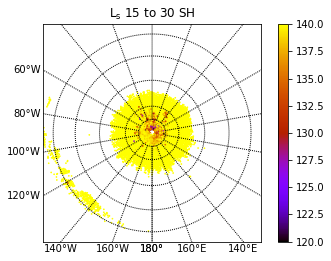

In [254]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 15 to 30 SH')
x,y = m(SLongSUB2,SLatSUB2)
m.scatter(x, y,c=STSUB2, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

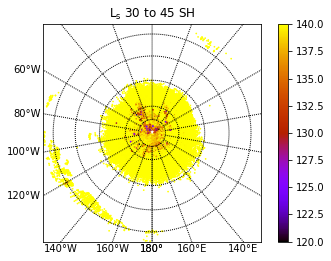

In [255]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 30 to 45 SH')
x,y = m(SLongSUB3,SLatSUB3)
m.scatter(x, y,c=STSUB3, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

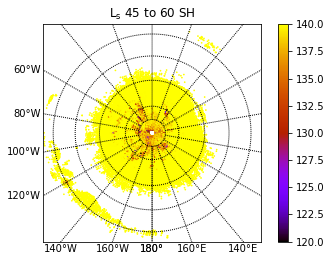

In [256]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 45 to 60 SH')
x,y = m(SLongSUB4,SLatSUB4)
m.scatter(x, y,c=STSUB4, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

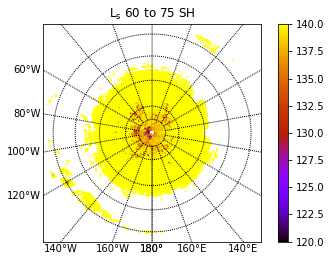

In [257]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 60 to 75 SH')
x,y = m(SLongSUB5,SLatSUB5)
m.scatter(x, y,c=STSUB5, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

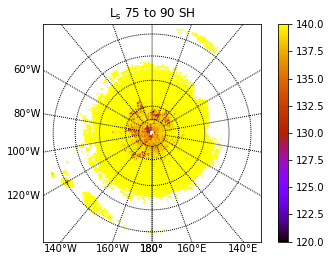

In [258]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 75 to 90 SH')
x,y = m(SLongSUB6,SLatSUB6)
m.scatter(x, y,c=STSUB6, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

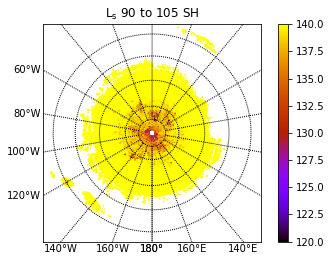

In [259]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 90 to 105 SH')
x,y = m(SLongSUB7,SLatSUB7)
m.scatter(x, y,c=STSUB7, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

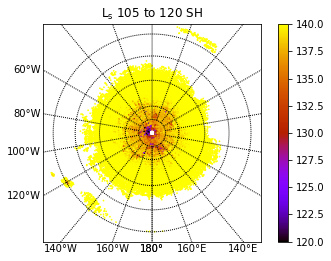

In [260]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 105 to 120 SH')
x,y = m(SLongSUB8,SLatSUB8)
m.scatter(x, y,c=STSUB8, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

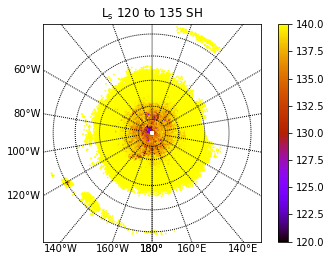

In [261]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 120 to 135 SH')
x,y = m(SLongSUB9,SLatSUB9)
m.scatter(x, y,c=STSUB9, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

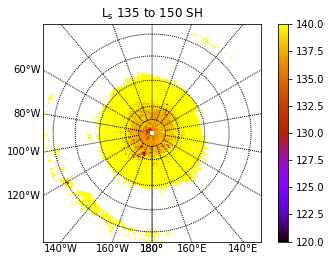

In [262]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 135 to 150 SH')
x,y = m(SLongSUB10,SLatSUB10)
m.scatter(x, y,c=STSUB10, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

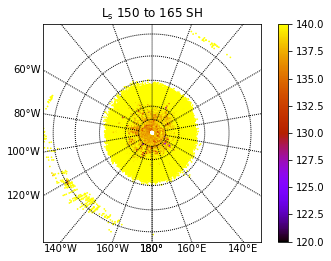

In [263]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 150 to 165 SH')
x,y = m(SLongSUB11,SLatSUB11)
m.scatter(x, y,c=STSUB11, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

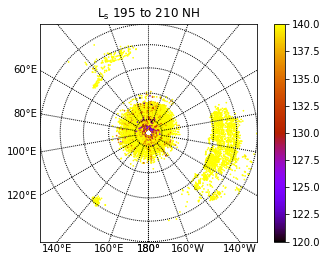

In [264]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 195 to 210 NH')
x,y = m(NLongSUB14,NLatSUB14)
m.scatter(x, y,c=NTSUB14, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

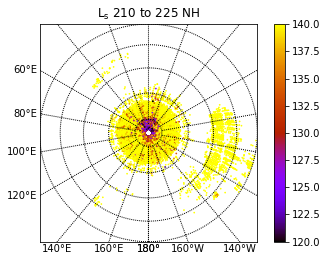

In [265]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 210 to 225 NH')
x,y = m(NLongSUB15,NLatSUB15)
m.scatter(x, y,c=NTSUB15, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

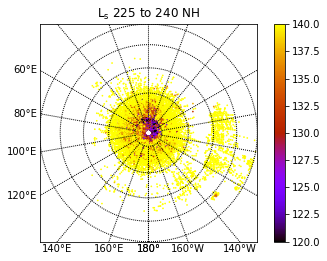

In [266]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 225 to 240 NH')
x,y = m(NLongSUB16,NLatSUB16)
m.scatter(x, y,c=NTSUB16, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

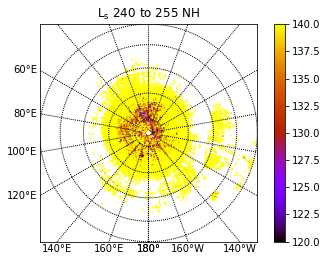

In [267]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 240 to 255 NH')
x,y = m(NLongSUB17,NLatSUB17)
m.scatter(x, y,c=NTSUB17, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

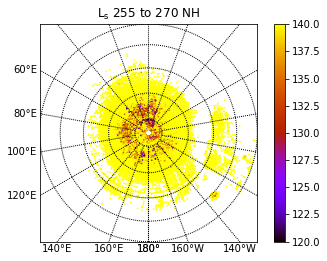

In [268]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 255 to 270 NH')
x,y = m(NLongSUB18,NLatSUB18)
m.scatter(x, y,c=NTSUB18, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

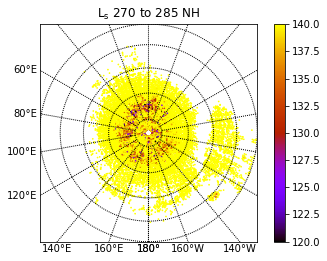

In [269]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 270 to 285 NH')
x,y = m(NLongSUB19,NLatSUB19)
m.scatter(x, y,c=NTSUB19, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

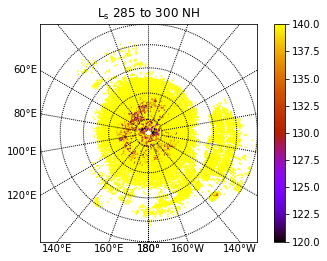

In [270]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 285 to 300 NH')
x,y = m(NLongSUB20,NLatSUB20)
m.scatter(x, y,c=NTSUB20, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

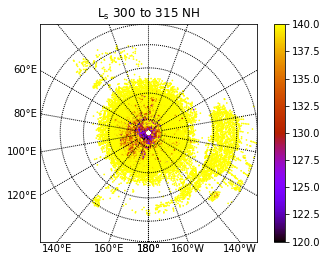

In [271]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 300 to 315 NH')
x,y = m(NLongSUB21,NLatSUB21)
m.scatter(x, y,c=NTSUB21, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()

In [272]:
rad = np.pi/180 #to be used later

In [273]:
'''Function to convert latitude from a lambert azimuthal projection into a radius of a circle 
this function is specifically for the northern hemisphere'''
def RNorth(phi):
    R = 2*(np.cos(((phi+90)*rad)/2))
    return R

In [274]:
'''Function to convert latitude from a lambert azimuthal projection into a radius of a circle 
this function is specifically for the southern hemisphere'''
def RSouth(phi):
    R = 2*(np.cos(((90-phi)*rad)/2))
    return R

In [275]:
#evaluated previous functions for Martian coordinates to get radii
r = RNorth(Lat_CO2_NWI)
s = RSouth(Lat_CO2_SWI)

In [276]:
'''Function to convert polar coordinates int cartesian this is the x component'''
def converttox(R,theta):
    x= R*(np.cos(theta*rad))
    return x

In [277]:
'''Function to convert polar coordinates int cartesian this is the y component'''
def converttoy(R,theta):
    y= R*(np.sin(theta*rad))
    return y

In [278]:
#used radii from previous function and Martian longitudes to convert from polar to cartesian
XNWI = converttox(r,Long_CO2_NWI)
YNWI = converttoy(r,Long_CO2_NWI)
XSWI = converttox(s,Long_CO2_SWI)
YSWI = converttoy(s,Long_CO2_SWI)

In [279]:
#converted previous variables into arrays
xNWI = np.array(XNWI)
yNWI = np.array(YNWI)
xSWI = np.array(XSWI)
ySWI = np.array(YSWI)

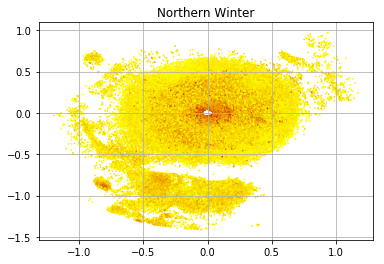

In [280]:
#plotted Martian north polar CO2 ice cap during northern winter in cartesian coordinates
plt.scatter(xNWI,yNWI,c=Temp_NWI, cmap='gnuplot', s=.5)
plt.title('Northern Winter')
plt.grid()
plt.show()

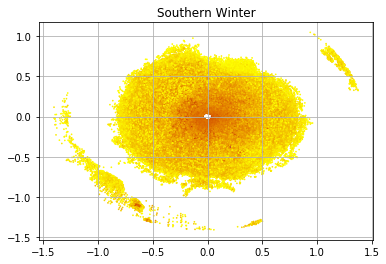

In [281]:
#plotted Martian south polar CO2 ice cap during southern winter in cartesian coordinates
plt.scatter(xSWI,ySWI,c=Temp_SWI, cmap='gnuplot', s=.5)
plt.title('Southern Winter')
plt.grid()
plt.show()

In [282]:
#evaluated R function to convert latitude to radii for the previously subdivided seasons into units of 15 L_s for southern hemisphere
s0 = RSouth(SLat_CO2_SUB2)
s1 = RSouth(SLat_CO2_SUB3)
s2 = RSouth(SLat_CO2_SUB4)
s3 = RSouth(SLat_CO2_SUB5)
s4 = RSouth(SLat_CO2_SUB6)
s5 = RSouth(SLat_CO2_SUB7)
s6 = RSouth(SLat_CO2_SUB8)
s7 = RSouth(SLat_CO2_SUB9)
s8 = RSouth(SLat_CO2_SUB10)
s9 = RSouth(SLat_CO2_SUB11)

In [283]:
#evaluated R function to convert latitude to radii for the previously subdivided seasons into units of 15 L_s for northern hemisphere
r0 = RNorth(NLat_CO2_SUB14)
r1 = RNorth(NLat_CO2_SUB15)
r2 = RNorth(NLat_CO2_SUB16)
r3 = RNorth(NLat_CO2_SUB17)
r4 = RNorth(NLat_CO2_SUB18)
r5 = RNorth(NLat_CO2_SUB19)
r6 = RNorth(NLat_CO2_SUB20)
r7 = RNorth(NLat_CO2_SUB21)
r8 = RNorth(NLat_CO2_SUB22)
r9 = RNorth(NLat_CO2_SUB23)

In [284]:
#used radii from previous function and Martian longitudes to convert from polar to cartesian northern hemisphere
XNWI_0 = converttox(r0,NLong_CO2_SUB14)
YNWI_0 = converttoy(r0,NLong_CO2_SUB14)
XNWI_1 = converttox(r1,NLong_CO2_SUB15)
YNWI_1 = converttoy(r1,NLong_CO2_SUB15)
XNWI_2 = converttox(r2,NLong_CO2_SUB16)
YNWI_2 = converttoy(r2,NLong_CO2_SUB16)
XNWI_3 = converttox(r3,NLong_CO2_SUB17)
YNWI_3 = converttoy(r3,NLong_CO2_SUB17)
XNWI_4 = converttox(r4,NLong_CO2_SUB18)
YNWI_4 = converttoy(r4,NLong_CO2_SUB18)
XNWI_5 = converttox(r5,NLong_CO2_SUB19)
YNWI_5 = converttoy(r5,NLong_CO2_SUB19)
XNWI_6 = converttox(r6,NLong_CO2_SUB20)
YNWI_6 = converttoy(r6,NLong_CO2_SUB20)
XNWI_7 = converttox(r7,NLong_CO2_SUB21)
YNWI_7 = converttoy(r7,NLong_CO2_SUB21)
XNWI_8 = converttox(r8,NLong_CO2_SUB22)
YNWI_8 = converttoy(r8,NLong_CO2_SUB22)
XNWI_9 = converttox(r9,NLong_CO2_SUB23)
YNWI_9 = converttoy(r9,NLong_CO2_SUB23)

In [285]:
#used radii from previous function and Martian longitudes to convert from polar to cartesian southern hemisphere
XSWI_0 = converttox(s0,SLong_CO2_SUB2)
YSWI_0 = converttoy(s0,SLong_CO2_SUB2)
XSWI_1 = converttox(s1,SLong_CO2_SUB3)
YSWI_1 = converttoy(s1,SLong_CO2_SUB3)
XSWI_2 = converttox(s2,SLong_CO2_SUB4)
YSWI_2 = converttoy(s2,SLong_CO2_SUB4)
XSWI_3 = converttox(s3,SLong_CO2_SUB5)
YSWI_3 = converttoy(s3,SLong_CO2_SUB5)
XSWI_4 = converttox(s4,SLong_CO2_SUB6)
YSWI_4 = converttoy(s4,SLong_CO2_SUB6)
XSWI_5 = converttox(s5,SLong_CO2_SUB7)
YSWI_5 = converttoy(s5,SLong_CO2_SUB7)
XSWI_6 = converttox(s6,SLong_CO2_SUB8)
YSWI_6 = converttoy(s6,SLong_CO2_SUB8)
XSWI_7 = converttox(s7,SLong_CO2_SUB9)
YSWI_7 = converttoy(s7,SLong_CO2_SUB9)
XSWI_8 = converttox(s8,SLong_CO2_SUB10)
YSWI_8 = converttoy(s8,SLong_CO2_SUB10)
XSWI_9 = converttox(s9,SLong_CO2_SUB11)
YSWI_9 = converttoy(s9,SLong_CO2_SUB11)

In [286]:
#converted previous variables into arrays 
xNWI_0 = np.array(XNWI_0)
yNWI_0 = np.array(YNWI_0)
xSWI_0 = np.array(XSWI_0)
ySWI_0 = np.array(YSWI_0)
xNWI_1 = np.array(XNWI_1)
yNWI_1 = np.array(YNWI_1)
xSWI_1 = np.array(XSWI_1)
ySWI_1 = np.array(YSWI_1)
xNWI_2 = np.array(XNWI_2)
yNWI_2 = np.array(YNWI_2)
xSWI_2 = np.array(XSWI_2)
ySWI_2 = np.array(YSWI_2)
xNWI_3 = np.array(XNWI_3)
yNWI_3 = np.array(YNWI_3)
xSWI_3 = np.array(XSWI_3)
ySWI_3 = np.array(YSWI_3)
xNWI_4 = np.array(XNWI_4)
yNWI_4 = np.array(YNWI_4)
xSWI_4 = np.array(XSWI_4)
ySWI_4 = np.array(YSWI_4)
xNWI_5 = np.array(XNWI_5)
yNWI_5 = np.array(YNWI_5)
xSWI_5 = np.array(XSWI_5)
ySWI_5 = np.array(YSWI_5)
xNWI_6 = np.array(XNWI_6)
yNWI_6 = np.array(YNWI_6)
xSWI_6 = np.array(XSWI_6)
ySWI_6 = np.array(YSWI_6)
xNWI_7 = np.array(XNWI_7)
yNWI_7 = np.array(YNWI_7)
xSWI_7 = np.array(XSWI_7)
ySWI_7 = np.array(YSWI_7)
xNWI_8 = np.array(XNWI_8)
yNWI_8 = np.array(YNWI_8)
xSWI_8 = np.array(XSWI_8)
ySWI_8 = np.array(YSWI_8)
xNWI_9 = np.array(XNWI_9)
yNWI_9 = np.array(YNWI_9)
xSWI_9 = np.array(XSWI_9)
ySWI_9 = np.array(YSWI_9)

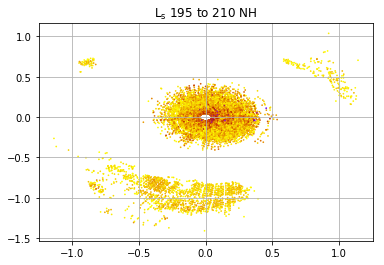

In [287]:
#plotted Martian north polar CO2 ice cap during northern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xNWI_0,yNWI_0,c=NTSUB14, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 195 to 210 NH')
plt.grid()
plt.show()

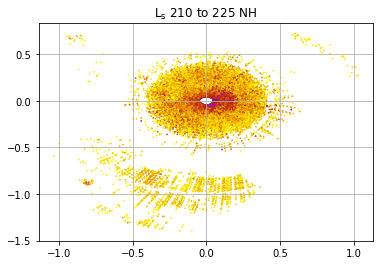

In [288]:
#plotted Martian north polar CO2 ice cap during northern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xNWI_1,yNWI_1,c=NTSUB15, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 210 to 225 NH')
plt.grid()
plt.show()

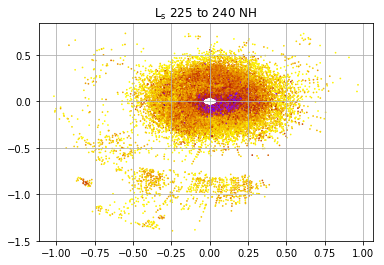

In [289]:
#plotted Martian north polar CO2 ice cap during northern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xNWI_2,yNWI_2,c=NTSUB16, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 225 to 240 NH')
plt.grid()
plt.show()

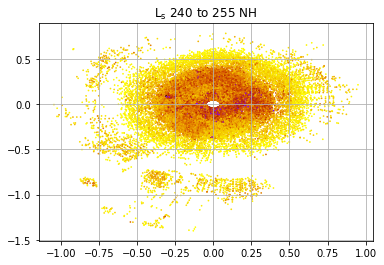

In [290]:
#plotted Martian north polar CO2 ice cap during northern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xNWI_3,yNWI_3,c=NTSUB17, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 240 to 255 NH')
plt.grid()
plt.show()

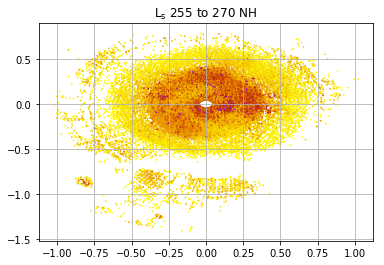

In [291]:
#plotted Martian north polar CO2 ice cap during northern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xNWI_4,yNWI_4,c=NTSUB18, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 255 to 270 NH')
plt.grid()
plt.show()

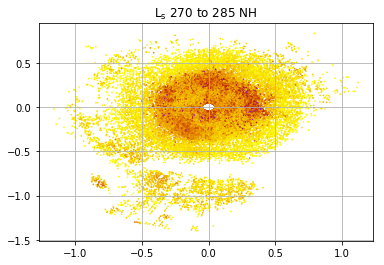

In [292]:
#plotted Martian north polar CO2 ice cap during northern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xNWI_5,yNWI_5,c=NTSUB19, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 270 to 285 NH')
plt.grid()
plt.show()

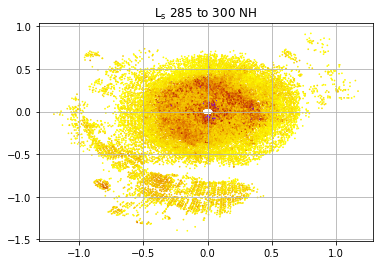

In [293]:
#plotted Martian north polar CO2 ice cap during northern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xNWI_6,yNWI_6,c=NTSUB20, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 285 to 300 NH')
plt.grid()
plt.show()

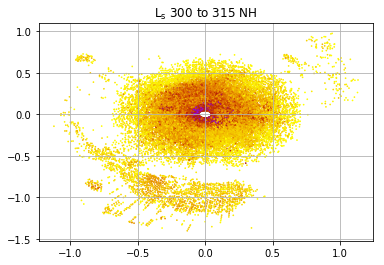

In [294]:
#plotted Martian north polar CO2 ice cap during northern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xNWI_7,yNWI_7,c=NTSUB21, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 300 to 315 NH')
plt.grid()
plt.show()

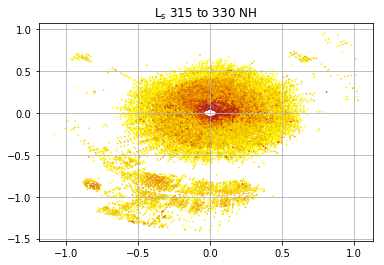

In [295]:
#plotted Martian north polar CO2 ice cap during northern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xNWI_8,yNWI_8,c=NTSUB22, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 315 to 330 NH')
plt.grid()
plt.show()

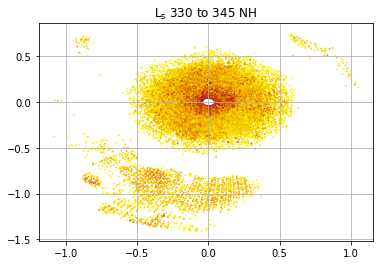

In [296]:
#plotted Martian north polar CO2 ice cap during northern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xNWI_9,yNWI_9,c=NTSUB23, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 330 to 345 NH')
plt.grid()
plt.show()

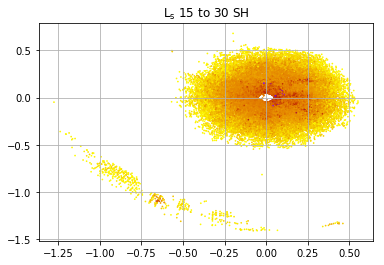

In [297]:
#plotted Martian north polar CO2 ice cap during southern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xSWI_0,ySWI_0,c=STSUB2, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 15 to 30 SH')
plt.grid()
plt.show()

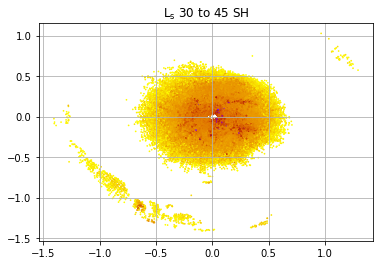

In [298]:
#plotted Martian north polar CO2 ice cap during southern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xSWI_1,ySWI_1,c=STSUB3, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 30 to 45 SH')
plt.grid()
plt.show()

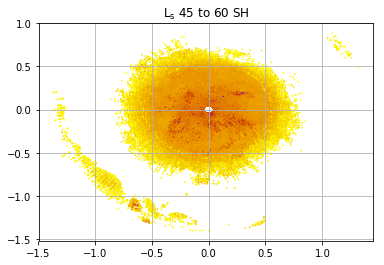

In [299]:
#plotted Martian north polar CO2 ice cap during southern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xSWI_2,ySWI_2,c=STSUB4, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 45 to 60 SH')
plt.grid()
plt.show()

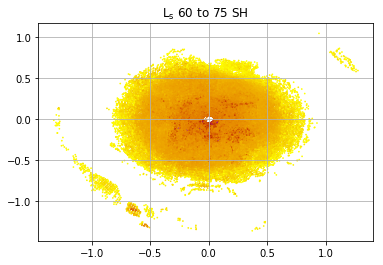

In [300]:
#plotted Martian north polar CO2 ice cap during southern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xSWI_3,ySWI_3,c=STSUB5, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 60 to 75 SH')
plt.grid()
plt.show()

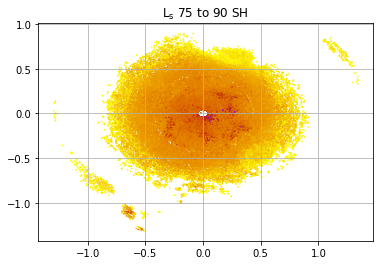

In [301]:
#plotted Martian north polar CO2 ice cap during southern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xSWI_4,ySWI_4,c=STSUB6, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 75 to 90 SH')
plt.grid()
plt.show()

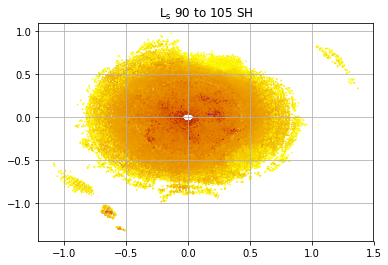

In [302]:
#plotted Martian north polar CO2 ice cap during southern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xSWI_5,ySWI_5,c=STSUB7, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 90 to 105 SH')
plt.grid()
plt.show()

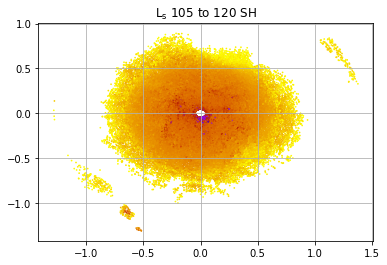

In [303]:
#plotted Martian north polar CO2 ice cap during southern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xSWI_6,ySWI_6,c=STSUB8, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 105 to 120 SH')
plt.grid()
plt.show()

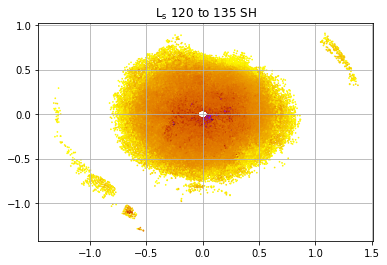

In [304]:
#plotted Martian north polar CO2 ice cap during southern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xSWI_7,ySWI_7,c=STSUB9, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 120 to 135 SH')
plt.grid()
plt.show()

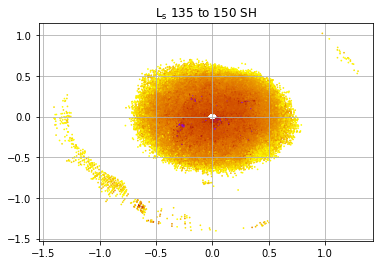

In [305]:
#plotted Martian north polar CO2 ice cap during southern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xSWI_8,ySWI_8,c=STSUB10, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 135 to 150 SH')
plt.grid()
plt.show()

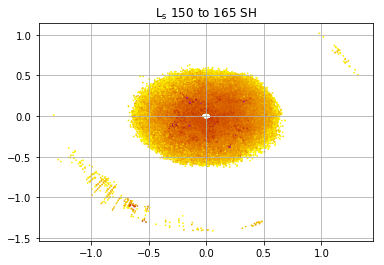

In [306]:
#plotted Martian north polar CO2 ice cap during southern winter in cartesian coordinates for every unit of 15 L_s
plt.scatter(xSWI_9,ySWI_9,c=STSUB11, cmap='gnuplot', s=.5)
plt.title('$\mathregular{L_s}$ 150 to 165 SH')
plt.grid()
plt.show()

In [307]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (North)
x_range = np.arange(-1.5,1.0,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

H, xedges, yedges, binnumber = stats.binned_statistic_2d(xNWI, yNWI, values = T_surf_CO2_NWI, statistic='mean' , bins = [xbins, ybins])

In [308]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1.5,1.5,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

H2, xedges, yedges, binnumber = stats.binned_statistic_2d(xSWI, ySWI, values = T_surf_CO2_SWI, statistic='mean' , bins = [xbins, ybins])

In [309]:
def IRFlux(T):
    '''Calculate the luminosity of the thing.'''
    sigma = 5.67e-8 # W/m**2/K**4
    boltz = sigma * T**4
    return boltz

In [310]:
#used pervious functions to calculate IR Flux of the northern and southern winter
NIR = IRFlux(H)
SIR = IRFlux(H2)

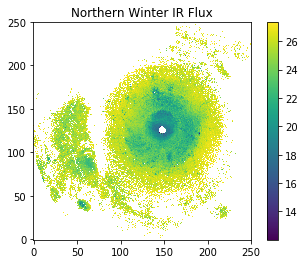

In [311]:
#plotted the IR Flux for Northern Hemisphere
plt.imshow(NIR,origin='lower')
plt.colorbar()
plt.title('Northern Winter IR Flux')
plt.show()

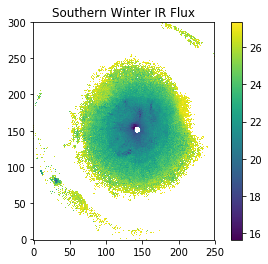

In [312]:
#plotted the IR Flux for Southern Hemisphere
plt.imshow(SIR,origin='lower')
plt.colorbar()
plt.title('Southern Winter IR Flux')
plt.show()

In [313]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)

x_range = np.arange(-1.5,1.0,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

B0, xedges, yedges, binnumber = stats.binned_statistic_2d(xNWI_0, yNWI_0, values = NTSUB14, statistic='mean' , bins = [xbins, ybins])

In [314]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1.5,1.0,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

B1, xedges, yedges, binnumber = stats.binned_statistic_2d(xNWI_1, yNWI_1, values = NTSUB15, statistic='mean' , bins = [xbins, ybins])

In [315]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1.5,1.0,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

B2, xedges, yedges, binnumber = stats.binned_statistic_2d(xNWI_2, yNWI_2, values = NTSUB16, statistic='mean' , bins = [xbins, ybins])

In [316]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1.5,1.0,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

B3, xedges, yedges, binnumber = stats.binned_statistic_2d(xNWI_3, yNWI_3, values = NTSUB17, statistic='mean' , bins = [xbins, ybins])

In [317]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1.5,1.0,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

B4, xedges, yedges, binnumber = stats.binned_statistic_2d(xNWI_4, yNWI_4, values = NTSUB18, statistic='mean' , bins = [xbins, ybins])

In [318]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1.5,1.0,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

B5, xedges, yedges, binnumber = stats.binned_statistic_2d(xNWI_5, yNWI_5, values = NTSUB19, statistic='mean' , bins = [xbins, ybins])

In [319]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1.5,1.0,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

B6, xedges, yedges, binnumber = stats.binned_statistic_2d(xNWI_6, yNWI_6, values = NTSUB20, statistic='mean' , bins = [xbins, ybins])

In [320]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1.5,1.0,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

B7, xedges, yedges, binnumber = stats.binned_statistic_2d(xNWI_7, yNWI_7, values = NTSUB21, statistic='mean' , bins = [xbins, ybins])

In [321]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1.5,1.0,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

B8, xedges, yedges, binnumber = stats.binned_statistic_2d(xNWI_8, yNWI_8, values = NTSUB22, statistic='mean' , bins = [xbins, ybins])

In [322]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1.5,1.0,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

B9, xedges, yedges, binnumber = stats.binned_statistic_2d(xNWI_9, yNWI_9, values = NTSUB23, statistic='mean' , bins = [xbins, ybins])

In [323]:
#used pervious functions to calculate IR Flux of the northern winter in units of 15 L_s
NIR_0 = IRFlux(B0)
NIR_1 = IRFlux(B1)
NIR_2 = IRFlux(B2)
NIR_3 = IRFlux(B3)
NIR_4 = IRFlux(B4)
NIR_5 = IRFlux(B5)
NIR_6 = IRFlux(B6)
NIR_7 = IRFlux(B7)
NIR_8 = IRFlux(B8)
NIR_9 = IRFlux(B9)

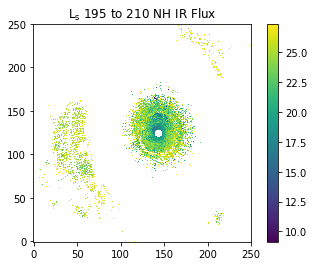

In [324]:
#plotted the IR Flux for Northern Hemisphere in units of 15 L_s
plt.imshow(NIR_0, origin='lower')
plt.title('$\mathregular{L_s}$ 195 to 210 NH IR Flux')
plt.colorbar()
plt.show()

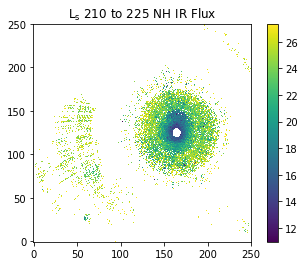

In [325]:
#plotted the IR Flux for Northern Hemisphere in units of 15 L_s
plt.imshow(NIR_1, origin='lower')
plt.title('$\mathregular{L_s}$ 210 to 225 NH IR Flux')
plt.colorbar()
plt.show()

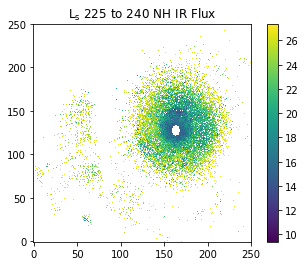

In [326]:
#plotted the IR Flux for Northern Hemisphere in units of 15 L_s
plt.imshow(NIR_2, origin='lower')
plt.title('$\mathregular{L_s}$ 225 to 240 NH IR Flux')
plt.colorbar()
plt.show()

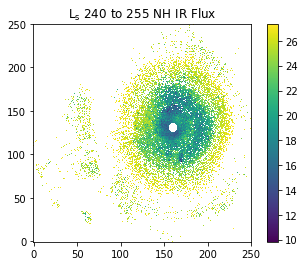

In [327]:
#plotted the IR Flux for Northern Hemisphere in units of 15 L_s
plt.imshow(NIR_3, origin='lower')
plt.title('$\mathregular{L_s}$ 240 to 255 NH IR Flux')
plt.colorbar()
plt.show()

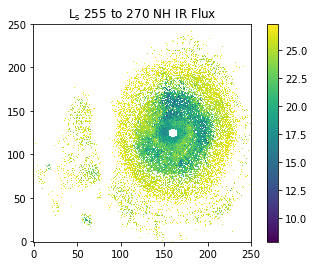

In [328]:
#plotted the IR Flux for Northern Hemisphere in units of 15 L_s
plt.imshow(NIR_4, origin='lower')
plt.title('$\mathregular{L_s}$ 255 to 270 NH IR Flux')
plt.colorbar()
plt.show()

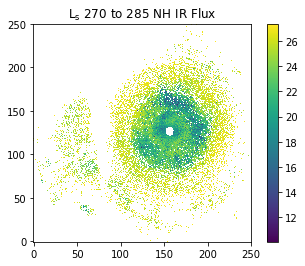

In [329]:
#plotted the IR Flux for Northern Hemisphere in units of 15 L_s
plt.imshow(NIR_5, origin='lower')
plt.title('$\mathregular{L_s}$ 270 to 285 NH IR Flux')
plt.colorbar()
plt.show()

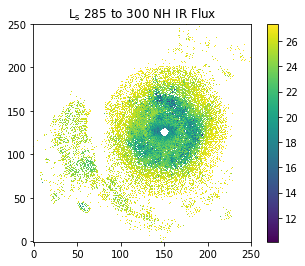

In [330]:
#plotted the IR Flux for Northern Hemisphere in units of 15 L_s
plt.imshow(NIR_6, origin='lower')
plt.title('$\mathregular{L_s}$ 285 to 300 NH IR Flux')
plt.colorbar()
plt.show()

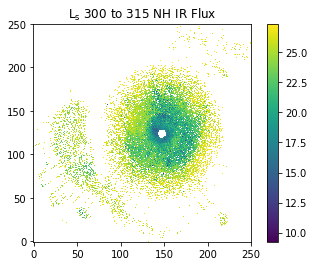

In [331]:
#plotted the IR Flux for Northern Hemisphere in units of 15 L_s
plt.imshow(NIR_7, origin='lower')
plt.title('$\mathregular{L_s}$ 300 to 315 NH IR Flux')
plt.colorbar()
plt.show()

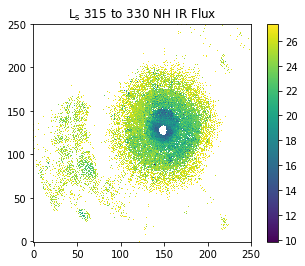

In [332]:
#plotted the IR Flux for Northern Hemisphere in units of 15 L_s
plt.imshow(NIR_8, origin='lower')
plt.title('$\mathregular{L_s}$ 315 to 330 NH IR Flux')
plt.colorbar()
plt.show()

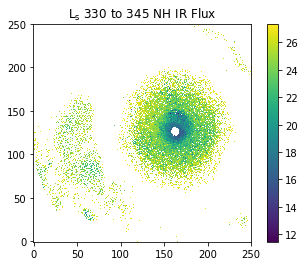

In [333]:
#plotted the IR Flux for Northern Hemisphere in units of 15 L_s
plt.imshow(NIR_9, origin='lower')
plt.title('$\mathregular{L_s}$ 330 to 345 NH IR Flux')
plt.colorbar()
plt.show()

In [334]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-1.5,1.5,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

C0, xedges, yedges, binnumber = stats.binned_statistic_2d(xSWI_0, ySWI_0, values = STSUB2, statistic='mean' , bins = [xbins, ybins])

In [335]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-1.5,1.5,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

C1, xedges, yedges, binnumber = stats.binned_statistic_2d(xSWI_1, ySWI_1, values = STSUB3, statistic='mean' , bins = [xbins, ybins])

In [336]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-1.5,1.5,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

C2, xedges, yedges, binnumber = stats.binned_statistic_2d(xSWI_2, ySWI_2, values = STSUB4, statistic='mean' , bins = [xbins, ybins])

In [337]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-1.5,1.5,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

C3, xedges, yedges, binnumber = stats.binned_statistic_2d(xSWI_3, ySWI_3, values = STSUB5, statistic='mean' , bins = [xbins, ybins])

In [338]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-1.5,1.5,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

C4, xedges, yedges, binnumber = stats.binned_statistic_2d(xSWI_4, ySWI_4, values = STSUB6, statistic='mean' , bins = [xbins, ybins])

In [339]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-1.5,1.5,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

C5, xedges, yedges, binnumber = stats.binned_statistic_2d(xSWI_5, ySWI_5, values = STSUB7, statistic='mean' , bins = [xbins, ybins])

In [340]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-1.5,1.5,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

C6, xedges, yedges, binnumber = stats.binned_statistic_2d(xSWI_6, ySWI_6, values = STSUB8, statistic='mean' , bins = [xbins, ybins])

In [341]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-1.5,1.5,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

C7, xedges, yedges, binnumber = stats.binned_statistic_2d(xSWI_7, ySWI_7, values = STSUB9, statistic='mean' , bins = [xbins, ybins])

In [342]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-1.5,1.5,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

C8, xedges, yedges, binnumber = stats.binned_statistic_2d(xSWI_8, ySWI_8, values = STSUB10, statistic='mean' , bins = [xbins, ybins])

In [343]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-1.5,1.5,.01)
y_range = np.arange(-1.5,1.0,.01)

xbins, ybins = len(x_range), len(y_range)

C9, xedges, yedges, binnumber = stats.binned_statistic_2d(xSWI_9, ySWI_9, values = STSUB11, statistic='mean' , bins = [xbins, ybins])

In [344]:
#used pervious functions to calculate IR Flux of the northern winter in units of 15 L_s
SIR_0 = IRFlux(C0)
SIR_1 = IRFlux(C1)
SIR_2 = IRFlux(C2)
SIR_3 = IRFlux(C3)
SIR_4 = IRFlux(C4)
SIR_5 = IRFlux(C5)
SIR_6 = IRFlux(C6)
SIR_7 = IRFlux(C7)
SIR_8 = IRFlux(C8)
SIR_9 = IRFlux(C9)

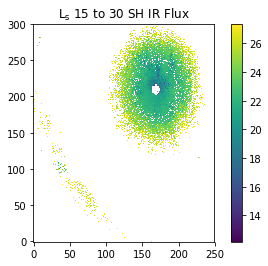

In [345]:
#plotted the IR Flux for Southern Hemisphere in units of 15 L_s
plt.imshow(SIR_0,origin='lower')
plt.colorbar()
plt.title('$\mathregular{L_s}$ 15 to 30 SH IR Flux')
plt.show()

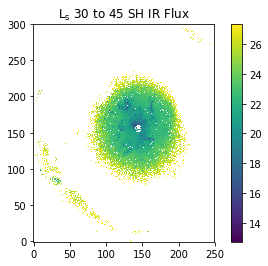

In [346]:
#plotted the IR Flux for Southern Hemisphere in units of 15 L_s
plt.imshow(SIR_1,origin='lower')
plt.colorbar()
plt.title('$\mathregular{L_s}$ 30 to 45 SH IR Flux')
plt.show()

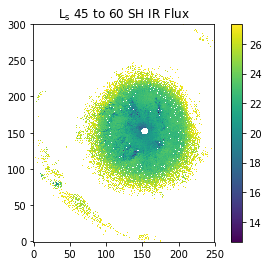

In [347]:
#plotted the IR Flux for Southern Hemisphere in units of 15 L_s
plt.imshow(SIR_2,origin='lower')
plt.colorbar()
plt.title('$\mathregular{L_s}$ 45 to 60 SH IR Flux')
plt.show()

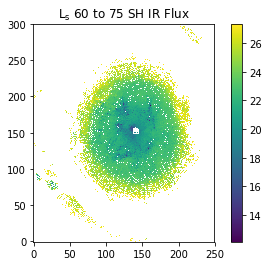

In [348]:
#plotted the IR Flux for Southern Hemisphere in units of 15 L_s
plt.imshow(SIR_3,origin='lower')
plt.colorbar()
plt.title('$\mathregular{L_s}$ 60 to 75 SH IR Flux')
plt.show()

In [349]:
#plotted the IR Flux for Southern Hemisphere in units of 15 L_s
plt.imshow(SIR_4,origin='lower')
plt.colorbar()
plt.title('$\mathregular{L_s}$ 75 to 90 SH IR Flux')
plt.show()

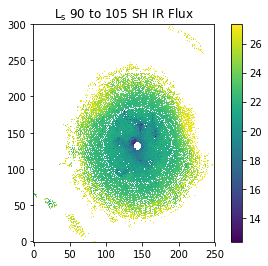

In [350]:
#plotted the IR Flux for Southern Hemisphere in units of 15 L_s
plt.imshow(SIR_5,origin='lower')
plt.colorbar()
plt.title('$\mathregular{L_s}$ 90 to 105 SH IR Flux')
plt.show()

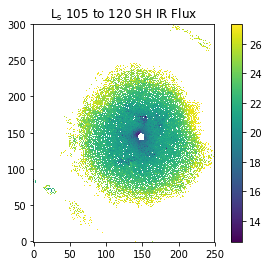

In [351]:
#plotted the IR Flux for Southern Hemisphere in units of 15 L_s
plt.imshow(SIR_6,origin='lower')
plt.colorbar()
plt.title('$\mathregular{L_s}$ 105 to 120 SH IR Flux')
plt.show()

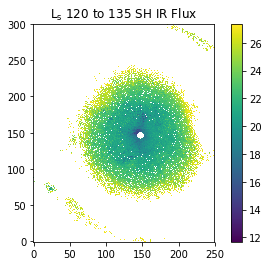

In [352]:
#plotted the IR Flux for Southern Hemisphere in units of 15 L_s
plt.imshow(SIR_7,origin='lower')
plt.colorbar()
plt.title('$\mathregular{L_s}$ 120 to 135 SH IR Flux')
plt.show()

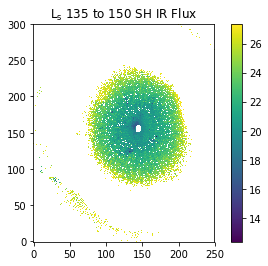

In [353]:
#plotted the IR Flux for Southern Hemisphere in units of 15 L_s
plt.imshow(SIR_8,origin='lower')
plt.colorbar()
plt.title('$\mathregular{L_s}$ 135 to 150 SH IR Flux')
plt.show()

In [354]:
#plotted the IR Flux for Southern Hemisphere in units of 15 L_s
plt.imshow(SIR_9,origin='lower')
plt.colorbar()
plt.title('$\mathregular{L_s}$ 150 to 165 SH IR Flux')
plt.show()